<a href="https://colab.research.google.com/github/Md-Sanzid-Bin-Hossain/Kinetics-FM-DLR-Net-Estimating-Kinetics-in-multiple-locomotion-modes/blob/main/Kinetics_FM_DLR_Net_Kinetics_3D_GRFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Let's import all packages that we may need:
import numpy
import tensorflow as tf
import statistics
from numpy import loadtxt
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU,LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statistics import stdev
import math


import numpy as np

from scipy.signal import butter,filtfilt

import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
import pandas
import matplotlib.pyplot as plt

## for Deep-learing:
import tensorflow.keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
to_categorical([0, 1, 2, 3], num_classes=4)
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.utils import np_utils
import itertools
from tensorflow.keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Flatten
from keras.layers import Bidirectional
#import constraint

from sklearn.model_selection import train_test_split
from keras.regularizers import l2


###  Library for attention layers

import pandas as pd
#import pyarrow.parquet as pq # Used to read the data
import os
import numpy as np
from tensorflow.keras.layers import * # Keras is the most friendly Neural Network library, this Kernel use a lot of layers classes
from tensorflow.keras.models import Model
from tqdm import tqdm # Processing time measurement
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K # The backend give us access to tensorflow operations and allow us to create the Attention class
from tensorflow.keras import optimizers # Allow us to access the Adam class to modify some parameters
from sklearn.model_selection import GridSearchCV, StratifiedKFold # Used to use Kfold to train our model
from tensorflow.keras.callbacks import * # This object helps the model to train in a smarter way, avoiding overfitting

from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
import statistics
import gc

### Early stopping

from tensorflow.keras.callbacks import EarlyStopping


from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
### subject 6 ###

#55.34

w6=74.84*9.81
h6=1.8

IMU_6= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_6_treamill_IMU.csv', delimiter=',')
IK_6= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_6_treamill_IK.csv', delimiter=',')
ID_6= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_6_treamill_ID.csv', delimiter=',')
GRF_6= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_6_treamill_GRF.csv', delimiter=',')

subject_6_treadmill=np.concatenate((IMU_6,IK_6,ID_6/(w6*h6),GRF_6/w6),axis=1)

In [ ]:
### subject 7 ###

w7=55.34*9.81
h7=1.65

IMU_7= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_7_treamill_IMU.csv', delimiter=',')
IK_7= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_7_treamill_IK.csv', delimiter=',')
ID_7= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_7_treamill_ID.csv', delimiter=',')
GRF_7= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_7_treamill_GRF.csv', delimiter=',')

subject_7_treadmill=np.concatenate((IMU_7,IK_7,ID_7/(w7*h7),GRF_7/w7),axis=1)

IMU_7= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_7_levelground_IMU.csv', delimiter=',')
IK_7= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_7_levelground_IK.csv', delimiter=',')
ID_7= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_7_levelground_ID.csv', delimiter=',')
GRF_7= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_7_levelground_GRF.csv', delimiter=',')

subject_7_levelground=np.concatenate((IMU_7,IK_7,ID_7/(w7*h7),GRF_7/w7),axis=1)

IMU_7= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_7_ramp_IMU.csv', delimiter=',')
IK_7= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_7_ramp_IK.csv', delimiter=',')
ID_7= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_7_ramp_ID.csv', delimiter=',')
GRF_7= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_7_ramp_GRF.csv', delimiter=',')

subject_7_ramp=np.concatenate((IMU_7,IK_7,ID_7/(w7*h7),GRF_7/w7),axis=1)

IMU_7= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_7_stair_IMU.csv', delimiter=',')
IK_7= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_7_stair_IK.csv', delimiter=',')
ID_7= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_7_stair_ID.csv', delimiter=',')
GRF_7= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_7_stair_GRF.csv', delimiter=',')

subject_7_stair=np.concatenate((IMU_7,IK_7,ID_7/(w7*h7),GRF_7/w7),axis=1)


# meta_data_7= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/AB_07_metadata.csv', delimiter=',')

# ### treadmill ###

# features_E_1=features_E_1.repeat(subject_7_treadmill.shape[0])
# features_E_1=features_E_1.reshape(16,subject_7_treadmill.shape[0])
# features_E_1=features_E_1.transpose()

# subject_7_treadmill=np.concatenate((subject_7_treadmill,features_E_1),axis=1)

# ### levelground ###

# features_E_1=features_E_1.repeat(subject_7_overground.shape[0])
# features_E_1=features_E_1.reshape(16,subject_7_overground.shape[0])
# features_E_1=features_E_1.transpose()

# subject_7_overground=np.concatenate((subject_7_overground,features_E_1),axis=1)


# ### ramp ###

# features_E_1=features_E_1.repeat(subject_7_stair_slope.shape[0])
# features_E_1=features_E_1.reshape(16,subject_7_stair_slope.shape[0])
# features_E_1=features_E_1.transpose()

# subject_7_stair_slope=np.concatenate((subject_7_stair_slope,features_E_1),axis=1)


# ### stair ###

# features_E_1=features_E_1.repeat(subject_7_stair_slope.shape[0])
# features_E_1=features_E_1.reshape(16,subject_7_stair_slope.shape[0])
# features_E_1=features_E_1.transpose()

# subject_7_stair_slope=np.concatenate((subject_7_stair_slope,features_E_1),axis=1)



In [ ]:
### subject 8 ###

w8=72.57*9.81
h8=1.74

IMU_8= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_8_treamill_IMU.csv', delimiter=',')
IK_8= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_8_treamill_IK.csv', delimiter=',')
ID_8= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_8_treamill_ID.csv', delimiter=',')
GRF_8= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_8_treamill_GRF.csv', delimiter=',')

subject_8_treadmill=np.concatenate((IMU_8,IK_8,ID_8/(w8*h8),GRF_8/w8),axis=1)


IMU_8= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_8_levelground_IMU.csv', delimiter=',')
IK_8= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_8_levelground_IK.csv', delimiter=',')
ID_8= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_8_levelground_ID.csv', delimiter=',')
GRF_8= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_8_levelground_GRF.csv', delimiter=',')

subject_8_levelground=np.concatenate((IMU_8,IK_8,ID_8/(w8*h8),GRF_8/w8),axis=1)


IMU_8= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_8_ramp_IMU.csv', delimiter=',')
IK_8= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_8_ramp_IK.csv', delimiter=',')
ID_8= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_8_ramp_ID.csv', delimiter=',')
GRF_8= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_8_ramp_GRF.csv', delimiter=',')

subject_8_ramp=np.concatenate((IMU_8,IK_8,ID_8/(w8*h8),GRF_8/w8),axis=1)


IMU_8= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_8_stair_IMU.csv', delimiter=',')
IK_8= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_8_stair_IK.csv', delimiter=',')
ID_8= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_8_stair_ID.csv', delimiter=',')
GRF_8= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_8_stair_GRF.csv', delimiter=',')

subject_8_stair=np.concatenate((IMU_8,IK_8,ID_8/(w8*h8),GRF_8/w8),axis=1)

In [ ]:
### subject 9 ###

w9=63.5*9.81
h9=1.63

IMU_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_treamill_IMU.csv', delimiter=',')
IK_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_treamill_IK.csv', delimiter=',')
ID_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_treamill_ID.csv', delimiter=',')
GRF_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_treamill_GRF.csv', delimiter=',')

subject_9_treadmill=np.concatenate((IMU_9,IK_9,ID_9/(w9*h9),GRF_9/w9),axis=1)


IMU_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_levelground_IMU.csv', delimiter=',')
IK_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_levelground_IK.csv', delimiter=',')
ID_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_levelground_ID.csv', delimiter=',')
GRF_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_levelground_GRF.csv', delimiter=',')

subject_9_levelground=np.concatenate((IMU_9,IK_9,ID_9/(w9*h9),GRF_9/w9),axis=1)


IMU_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_ramp_IMU_1.csv', delimiter=',')
IK_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_ramp_IK_1.csv', delimiter=',')
ID_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_ramp_ID_1.csv', delimiter=',')
GRF_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_ramp_GRF_1.csv', delimiter=',')

subject_9_ramp_1=np.concatenate((IMU_9,IK_9,ID_9/(w9*h9),GRF_9/w9),axis=1)


IMU_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_ramp_IMU_2.csv', delimiter=',')
IK_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_ramp_IK_2.csv', delimiter=',')
ID_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_ramp_ID_2.csv', delimiter=',')
GRF_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_ramp_GRF_2.csv', delimiter=',')

subject_9_ramp_2=np.concatenate((IMU_9,IK_9,ID_9/(w9*h9),GRF_9/w9),axis=1)


subject_9_ramp=np.concatenate((subject_9_ramp_1,subject_9_ramp_2),axis=0)



IMU_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_stair_IMU.csv', delimiter=',')
IK_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_stair_IK.csv', delimiter=',')
ID_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_stair_ID.csv', delimiter=',')
GRF_9= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_9_stair_GRF.csv', delimiter=',')

subject_9_stair=np.concatenate((IMU_9,IK_9,ID_9/(w9*h9),GRF_9/w9),axis=1)



In [ ]:
### subject 10 ###

w10=83.91*9.81
h10=1.75

IMU_10= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_10_treamill_IMU.csv', delimiter=',')
IK_10= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_10_treamill_IK.csv', delimiter=',')
ID_10= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_10_treamill_ID.csv', delimiter=',')
GRF_10= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_10_treamill_GRF.csv', delimiter=',')

subject_10_treadmill=np.concatenate((IMU_10,IK_10,ID_10/(w10*h10),GRF_10/w10),axis=1)


IMU_10= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_10_levelground_IMU.csv', delimiter=',')
IK_10= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_10_levelground_IK.csv', delimiter=',')
ID_10= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_10_levelground_ID.csv', delimiter=',')
GRF_10= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_10_levelground_GRF.csv', delimiter=',')

subject_10_levelground=np.concatenate((IMU_10,IK_10,ID_10/(w10*h10),GRF_10/w10),axis=1)


IMU_10= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_10_ramp_IMU.csv', delimiter=',')
IK_10= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_10_ramp_IK.csv', delimiter=',')
ID_10= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_10_ramp_ID.csv', delimiter=',')
GRF_10= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_10_ramp_GRF.csv', delimiter=',')

subject_10_ramp=np.concatenate((IMU_10,IK_10,ID_10/(w10*h10),GRF_10/w10),axis=1)

IMU_10= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_10_stair_IMU.csv', delimiter=',')
IK_10= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_10_stair_IK.csv', delimiter=',')
ID_10= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_10_stair_ID.csv', delimiter=',')
GRF_10= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_10_stair_GRF.csv', delimiter=',')

subject_10_stair=np.concatenate((IMU_10,IK_10,ID_10/(w10*h10),GRF_10/w10),axis=1)




In [ ]:
### subject 11 ###

#55.34
w11=77.11*9.81
h11=1.75

IMU_11= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_11_treamill_IMU.csv', delimiter=',')
IK_11= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_11_treamill_IK.csv', delimiter=',')
ID_11= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_11_treamill_ID.csv', delimiter=',')
GRF_11= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_11_treamill_GRF.csv', delimiter=',')

subject_11_treadmill=np.concatenate((IMU_11,IK_11,ID_11/(w11*h11),GRF_11/w11),axis=1)


IMU_11= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_11_levelground_IMU.csv', delimiter=',')
IK_11= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_11_levelground_IK.csv', delimiter=',')
ID_11= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_11_levelground_ID.csv', delimiter=',')
GRF_11= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_11_levelground_GRF.csv', delimiter=',')

subject_11_levelground=np.concatenate((IMU_11,IK_11,ID_11/(w11*h11),GRF_11/w11),axis=1)


IMU_11= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_11_ramp_IMU.csv', delimiter=',')
IK_11= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_11_ramp_IK.csv', delimiter=',')
ID_11= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_11_ramp_ID.csv', delimiter=',')
GRF_11= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_11_ramp_GRF.csv', delimiter=',')

subject_11_ramp=np.concatenate((IMU_11,IK_11,ID_11/(w11*h11),GRF_11/w11),axis=1)


IMU_11= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_11_stair_IMU.csv', delimiter=',')
IK_11= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_11_stair_IK.csv', delimiter=',')
ID_11= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_11_stair_ID.csv', delimiter=',')
GRF_11= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_11_stair_GRF.csv', delimiter=',')

subject_11_stair=np.concatenate((IMU_11,IK_11,ID_11/(w11*h11),GRF_11/w11),axis=1)

In [ ]:
### subject 12 ###

#55.34
w12=86.18*9.81
h12=1.74

IMU_12= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_12_treamill_IMU.csv', delimiter=',')
IK_12= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_12_treamill_IK.csv', delimiter=',')
ID_12= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_12_treamill_ID.csv', delimiter=',')
GRF_12= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_12_treamill_GRF.csv', delimiter=',')

subject_12_treadmill=np.concatenate((IMU_12,IK_12,ID_12/(w12*h12),GRF_12/w12),axis=1)


IMU_12= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_12_levelground_IMU.csv', delimiter=',')
IK_12= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_12_levelground_IK.csv', delimiter=',')
ID_12= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_12_levelground_ID.csv', delimiter=',')
GRF_12= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_12_levelground_GRF.csv', delimiter=',')

subject_12_levelground=np.concatenate((IMU_12,IK_12,ID_12/(w12*h12),GRF_12/w12),axis=1)


IMU_12= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_12_ramp_IMU.csv', delimiter=',')
IK_12= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_12_ramp_IK.csv', delimiter=',')
ID_12= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_12_ramp_ID.csv', delimiter=',')
GRF_12= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_12_ramp_GRF.csv', delimiter=',')

subject_12_ramp=np.concatenate((IMU_12,IK_12,ID_12/(w12*h12),GRF_12/w12),axis=1)


IMU_12= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_12_stair_IMU.csv', delimiter=',')
IK_12= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_12_stair_IK.csv', delimiter=',')
ID_12= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_12_stair_ID.csv', delimiter=',')
GRF_12= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_12_stair_GRF.csv', delimiter=',')

subject_12_stair=np.concatenate((IMU_12,IK_12,ID_12/(w12*h12),GRF_12/w12),axis=1)

In [ ]:
### subject 13 ###

#55.34
w13=58.97*9.81
h13=1.73

IMU_13= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_13_treamill_IMU.csv', delimiter=',')
IK_13= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_13_treamill_IK.csv', delimiter=',')
ID_13= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_13_treamill_ID.csv', delimiter=',')
GRF_13= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_13_treamill_GRF.csv', delimiter=',')

subject_13_treadmill=np.concatenate((IMU_13,IK_13,ID_13/(w13*h13),GRF_13/w13),axis=1)



IMU_13= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_13_levelground_IMU.csv', delimiter=',')
IK_13= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_13_levelground_IK.csv', delimiter=',')
ID_13= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_13_levelground_ID.csv', delimiter=',')
GRF_13= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_13_levelground_GRF.csv', delimiter=',')

subject_13_levelground=np.concatenate((IMU_13,IK_13,ID_13/(w13*h13),GRF_13/w13),axis=1)


IMU_13= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_13_ramp_IMU.csv', delimiter=',')
IK_13= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_13_ramp_IK.csv', delimiter=',')
ID_13= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_13_ramp_ID.csv', delimiter=',')
GRF_13= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_13_ramp_GRF.csv', delimiter=',')

subject_13_ramp=np.concatenate((IMU_13,IK_13,ID_13/(w13*h13),GRF_13/w13),axis=1)


IMU_13= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_13_stair_IMU.csv', delimiter=',')
IK_13= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_13_stair_IK.csv', delimiter=',')
ID_13= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_13_stair_ID.csv', delimiter=',')
GRF_13= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_13_stair_GRF.csv', delimiter=',')

subject_13_stair=np.concatenate((IMU_13,IK_13,ID_13/(w13*h13),GRF_13/w13),axis=1)

In [ ]:
### subject 14 ###

#55.34
w14=58.41*9.81
h14=1.52

IMU_14= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_14_treamill_IMU.csv', delimiter=',')
IK_14= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_14_treamill_IK.csv', delimiter=',')
ID_14= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_14_treamill_ID.csv', delimiter=',')
GRF_14= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_14_treamill_GRF.csv', delimiter=',')

subject_14_treadmill=np.concatenate((IMU_14,IK_14,ID_14/(w14*h14),GRF_14/w14),axis=1)



IMU_14= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_14_levelground_IMU.csv', delimiter=',')
IK_14= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_14_levelground_IK.csv', delimiter=',')
ID_14= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_14_levelground_ID.csv', delimiter=',')
GRF_14= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_14_levelground_GRF.csv', delimiter=',')

subject_14_levelground=np.concatenate((IMU_14,IK_14,ID_14/(w14*h14),GRF_14/w14),axis=1)


IMU_14= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_14_ramp_IMU.csv', delimiter=',')
IK_14= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_14_ramp_IK.csv', delimiter=',')
ID_14= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_14_ramp_ID.csv', delimiter=',')
GRF_14= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_14_ramp_GRF.csv', delimiter=',')

subject_14_ramp=np.concatenate((IMU_14,IK_14,ID_14/(w14*h14),GRF_14/w14),axis=1)


IMU_14= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_14_stair_IMU.csv', delimiter=',')
IK_14= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_14_stair_IK.csv', delimiter=',')
ID_14= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_14_stair_ID.csv', delimiter=',')
GRF_14= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_14_stair_GRF.csv', delimiter=',')

subject_14_stair=np.concatenate((IMU_14,IK_14,ID_14/(w14*h14),GRF_14/w14),axis=1)

In [ ]:
### subject 15 ###

#55.34
w15=96.16*9.81
h15=1.78

IMU_15= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_15_treamill_IMU.csv', delimiter=',')
IK_15= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_15_treamill_IK.csv', delimiter=',')
ID_15= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_15_treamill_ID.csv', delimiter=',')
GRF_15= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_15_treamill_GRF.csv', delimiter=',')

subject_15_treadmill=np.concatenate((IMU_15,IK_15,ID_15/(w15*h15),GRF_15/w15),axis=1)


IMU_15= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_15_levelground_IMU.csv', delimiter=',')
IK_15= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_15_levelground_IK.csv', delimiter=',')
ID_15= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_15_levelground_ID.csv', delimiter=',')
GRF_15= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_15_levelground_GRF.csv', delimiter=',')

subject_15_levelground=np.concatenate((IMU_15,IK_15,ID_15/(w15*h15),GRF_15/w15),axis=1)


IMU_15= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_15_ramp_IMU.csv', delimiter=',')
IK_15= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_15_ramp_IK.csv', delimiter=',')
ID_15= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_15_ramp_ID.csv', delimiter=',')
GRF_15= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_15_ramp_GRF.csv', delimiter=',')

subject_15_ramp=np.concatenate((IMU_15,IK_15,ID_15/(w15*h15),GRF_15/w15),axis=1)


IMU_15= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_15_stair_IMU.csv', delimiter=',')
IK_15= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_15_stair_IK.csv', delimiter=',')
ID_15= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_15_stair_ID.csv', delimiter=',')
GRF_15= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_15_stair_GRF.csv', delimiter=',')

subject_15_stair=np.concatenate((IMU_15,IK_15,ID_15/(w15*h15),GRF_15/w15),axis=1)

In [ ]:
### subject 16 ###

#55.34
w16=55.79*9.81
h16=1.65

IMU_16= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_16_treamill_IMU.csv', delimiter=',')
IK_16= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_16_treamill_IK.csv', delimiter=',')
ID_16= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_16_treamill_ID.csv', delimiter=',')
GRF_16= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_16_treamill_GRF.csv', delimiter=',')

subject_16_treadmill=np.concatenate((IMU_16,IK_16,ID_16/(w16*h16),GRF_16/w16),axis=1)

IMU_16= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_16_levelground_IMU.csv', delimiter=',')
IK_16= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_16_levelground_IK.csv', delimiter=',')
ID_16= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_16_levelground_ID.csv', delimiter=',')
GRF_16= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_16_levelground_GRF.csv', delimiter=',')

subject_16_levelground=np.concatenate((IMU_16,IK_16,ID_16/(w16*h16),GRF_16/w16),axis=1)


IMU_16= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_16_ramp_IMU.csv', delimiter=',')
IK_16= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_16_ramp_IK.csv', delimiter=',')
ID_16= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_16_ramp_ID.csv', delimiter=',')
GRF_16= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_16_ramp_GRF.csv', delimiter=',')

subject_16_ramp=np.concatenate((IMU_16,IK_16,ID_16/(w16*h16),GRF_16/w16),axis=1)


IMU_16= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_16_stair_IMU.csv', delimiter=',')
IK_16= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_16_stair_IK.csv', delimiter=',')
ID_16= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_16_stair_ID.csv', delimiter=',')
GRF_16= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_16_stair_GRF.csv', delimiter=',')

subject_16_stair=np.concatenate((IMU_16,IK_16,ID_16/(w16*h16),GRF_16/w16),axis=1)

In [ ]:
### subject 17 ###

#55.34
w17=61.23*9.81
h17=1.68

IMU_17= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_17_treamill_IMU.csv', delimiter=',')
IK_17= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_17_treamill_IK.csv', delimiter=',')
ID_17= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_17_treamill_ID.csv', delimiter=',')
GRF_17= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_17_treamill_GRF.csv', delimiter=',')

subject_17_treadmill=np.concatenate((IMU_17,IK_17,ID_17/(w17*h17),GRF_17/w17),axis=1)


IMU_17= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_17_levelground_IMU.csv', delimiter=',')
IK_17= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_17_levelground_IK.csv', delimiter=',')
ID_17= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_17_levelground_ID.csv', delimiter=',')
GRF_17= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_17_levelground_GRF.csv', delimiter=',')

subject_17_levelground=np.concatenate((IMU_17,IK_17,ID_17/(w17*h17),GRF_17/w17),axis=1)


IMU_17= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_17_ramp_IMU.csv', delimiter=',')
IK_17= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_17_ramp_IK.csv', delimiter=',')
ID_17= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_17_ramp_ID.csv', delimiter=',')
GRF_17= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_17_ramp_GRF.csv', delimiter=',')

subject_17_ramp=np.concatenate((IMU_17,IK_17,ID_17/(w17*h17),GRF_17/w17),axis=1)


IMU_17= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_17_stair_IMU.csv', delimiter=',')
IK_17= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_17_stair_IK.csv', delimiter=',')
ID_17= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_17_stair_ID.csv', delimiter=',')
GRF_17= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_17_stair_GRF.csv', delimiter=',')

subject_17_stair=np.concatenate((IMU_17,IK_17,ID_17/(w17*h17),GRF_17/w17),axis=1)

In [ ]:
### subject 18 ###

#55.34
w18=60.13*9.81
h18=1.8

IMU_18= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_18_treamill_IMU.csv', delimiter=',')
IK_18= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_18_treamill_IK.csv', delimiter=',')
ID_18= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_18_treamill_ID.csv', delimiter=',')
GRF_18= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_18_treamill_GRF.csv', delimiter=',')

subject_18_treadmill=np.concatenate((IMU_18,IK_18,ID_18/(w18*h18),GRF_18/w18),axis=1)


IMU_18= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_18_levelground_IMU.csv', delimiter=',')
IK_18= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_18_levelground_IK.csv', delimiter=',')
ID_18= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_18_levelground_ID.csv', delimiter=',')
GRF_18= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_18_levelground_GRF.csv', delimiter=',')

subject_18_levelground=np.concatenate((IMU_18,IK_18,ID_18/(w18*h18),GRF_18/w18),axis=1)


IMU_18= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_18_ramp_IMU.csv', delimiter=',')
IK_18= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_18_ramp_IK.csv', delimiter=',')
ID_18= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_18_ramp_ID.csv', delimiter=',')
GRF_18= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_18_ramp_GRF.csv', delimiter=',')

subject_18_ramp=np.concatenate((IMU_18,IK_18,ID_18/(w18*h18),GRF_18/w18),axis=1)


IMU_18= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_18_stair_IMU.csv', delimiter=',')
IK_18= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_18_stair_IK.csv', delimiter=',')
ID_18= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_18_stair_ID.csv', delimiter=',')
GRF_18= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_18_stair_GRF.csv', delimiter=',')

subject_18_stair=np.concatenate((IMU_18,IK_18,ID_18/(w18*h18),GRF_18/w18),axis=1)

In [ ]:
### subject 19 ###

#55.34
w19=68.04*9.81
h19=1.7

IMU_19= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_19_treamill_IMU.csv', delimiter=',')
IK_19= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_19_treamill_IK.csv', delimiter=',')
ID_19= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_19_treamill_ID.csv', delimiter=',')
GRF_19= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_19_treamill_GRF.csv', delimiter=',')

subject_19_treadmill=np.concatenate((IMU_19,IK_19,ID_19/(w19*h19),GRF_19/w19),axis=1)


IMU_19= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_19_levelground_IMU.csv', delimiter=',')
IK_19= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_19_levelground_IK.csv', delimiter=',')
ID_19= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_19_levelground_ID.csv', delimiter=',')
GRF_19= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_19_levelground_GRF.csv', delimiter=',')

subject_19_levelground=np.concatenate((IMU_19,IK_19,ID_19/(w19*h19),GRF_19/w19),axis=1)


IMU_19= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_19_ramp_IMU.csv', delimiter=',')
IK_19= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_19_ramp_IK.csv', delimiter=',')
ID_19= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_19_ramp_ID.csv', delimiter=',')
GRF_19= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_19_ramp_GRF.csv', delimiter=',')

subject_19_ramp=np.concatenate((IMU_19,IK_19,ID_19/(w19*h19),GRF_19/w19),axis=1)


IMU_19= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_19_stair_IMU.csv', delimiter=',')
IK_19= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_19_stair_IK.csv', delimiter=',')
ID_19= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_19_stair_ID.csv', delimiter=',')
GRF_19= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_19_stair_GRF.csv', delimiter=',')

subject_19_stair=np.concatenate((IMU_19,IK_19,ID_19/(w19*h19),GRF_19/w19),axis=1)

In [ ]:
### subject 20 ###

#55.34
w20=68.04*9.81
h20=1.71

IMU_20= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_20_treamill_IMU.csv', delimiter=',')
IK_20= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_20_treamill_IK.csv', delimiter=',')
ID_20= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_20_treamill_ID.csv', delimiter=',')
GRF_20= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_20_treamill_GRF.csv', delimiter=',')

subject_20_treadmill=np.concatenate((IMU_20,IK_20,ID_20/(w20*h20),GRF_20/w20),axis=1)


# IMU_20= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_20_levelground_IMU.csv', delimiter=',')
# IK_20= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_20_levelground_IK.csv', delimiter=',')
# ID_20= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_20_levelground_ID.csv', delimiter=',')
# GRF_20= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_20_levelground_GRF.csv', delimiter=',')

# subject_20_levelground=np.concatenate((IMU_20,IK_20,ID_20/(w20*h20),GRF_20/w20),axis=1)


# IMU_20= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_20_ramp_IMU.csv', delimiter=',')
# IK_20= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_20_ramp_IK.csv', delimiter=',')
# ID_20= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_20_ramp_ID.csv', delimiter=',')
# GRF_20= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_20_ramp_GRF.csv', delimiter=',')

# subject_20_ramp=np.concatenate((IMU_20,IK_20,ID_20/(w20*h20),GRF_20/w20),axis=1)


# IMU_20= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_20_stair_IMU.csv', delimiter=',')
# IK_20= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_20_stair_IK.csv', delimiter=',')
# ID_20= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_20_stair_ID.csv', delimiter=',')
# GRF_20= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_20_stair_GRF.csv', delimiter=',')

# subject_20_stair=np.concatenate((IMU_20,IK_20,ID_20/(w20*h20),GRF_20/w20),axis=1)

In [ ]:
### subject 21 ###

#55.34
w21=58.06*9.81
h21=1.57

IMU_21= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_21_treamill_IMU.csv', delimiter=',')
IK_21= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_21_treamill_IK.csv', delimiter=',')
ID_21= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_21_treamill_ID.csv', delimiter=',')
GRF_21= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_21_treamill_GRF.csv', delimiter=',')

subject_21_treadmill=np.concatenate((IMU_21,IK_21,ID_21/(w21*h21),GRF_21/w21),axis=1)


IMU_21= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_21_levelground_IMU.csv', delimiter=',')
IK_21= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_21_levelground_IK.csv', delimiter=',')
ID_21= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_21_levelground_ID.csv', delimiter=',')
GRF_21= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_21_levelground_GRF.csv', delimiter=',')

subject_21_levelground=np.concatenate((IMU_21,IK_21,ID_21/(w21*h21),GRF_21/w21),axis=1)


IMU_21= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_21_ramp_IMU.csv', delimiter=',')
IK_21= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_21_ramp_IK.csv', delimiter=',')
ID_21= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_21_ramp_ID.csv', delimiter=',')
GRF_21= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_21_ramp_GRF.csv', delimiter=',')

subject_21_ramp=np.concatenate((IMU_21,IK_21,ID_21/(w21*h21),GRF_21/w21),axis=1)


IMU_21= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_21_stair_IMU.csv', delimiter=',')
IK_21= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_21_stair_IK.csv', delimiter=',')
ID_21= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_21_stair_ID.csv', delimiter=',')
GRF_21= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_21_stair_GRF.csv', delimiter=',')

subject_21_stair=np.concatenate((IMU_21,IK_21,ID_21/(w21*h21),GRF_21/w21),axis=1)

In [ ]:
### subject 23 ###

#55.34
w23=76.82*9.81
h23=1.8

IMU_23= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_23_treamill_IMU.csv', delimiter=',')
IK_23= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_23_treamill_IK.csv', delimiter=',')
ID_23= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_23_treamill_ID.csv', delimiter=',')
GRF_23= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_23_treamill_GRF.csv', delimiter=',')

subject_23_treadmill=np.concatenate((IMU_23,IK_23,ID_23/(w23*h23),GRF_23/w23),axis=1)


IMU_23= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_23_levelground_IMU.csv', delimiter=',')
IK_23= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_23_levelground_IK.csv', delimiter=',')
ID_23= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_23_levelground_ID.csv', delimiter=',')
GRF_23= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_23_levelground_GRF.csv', delimiter=',')

subject_23_levelground=np.concatenate((IMU_23,IK_23,ID_23/(w23*h23),GRF_23/w23),axis=1)


IMU_23= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_23_ramp_IMU.csv', delimiter=',')
IK_23= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_23_ramp_IK.csv', delimiter=',')
ID_23= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_23_ramp_ID.csv', delimiter=',')
GRF_23= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_23_ramp_GRF.csv', delimiter=',')

subject_23_ramp=np.concatenate((IMU_23,IK_23,ID_23/(w23*h23),GRF_23/w23),axis=1)


IMU_23= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_23_stair_IMU.csv', delimiter=',')
IK_23= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_23_stair_IK.csv', delimiter=',')
ID_23= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_23_stair_ID.csv', delimiter=',')
GRF_23= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_23_stair_GRF.csv', delimiter=',')

subject_23_stair=np.concatenate((IMU_23,IK_23,ID_23/(w23*h23),GRF_23/w23),axis=1)

In [ ]:
### subject 24 ###

#55.34
w24=72.57*9.81
h24=1.73

IMU_24= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_24_treamill_IMU.csv', delimiter=',')
IK_24= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_24_treamill_IK.csv', delimiter=',')
ID_24= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_24_treamill_ID.csv', delimiter=',')
GRF_24= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_24_treamill_GRF.csv', delimiter=',')

subject_24_treadmill=np.concatenate((IMU_24,IK_24,ID_24/(w24*h24),GRF_24/w24),axis=1)


IMU_24= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_24_levelground_IMU.csv', delimiter=',')
IK_24= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_24_levelground_IK.csv', delimiter=',')
ID_24= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_24_levelground_ID.csv', delimiter=',')
GRF_24= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_24_levelground_GRF.csv', delimiter=',')

subject_24_levelground=np.concatenate((IMU_24,IK_24,ID_24/(w24*h24),GRF_24/w24),axis=1)


IMU_24= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_24_ramp_IMU.csv', delimiter=',')
IK_24= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_24_ramp_IK.csv', delimiter=',')
ID_24= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_24_ramp_ID.csv', delimiter=',')
GRF_24= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_24_ramp_GRF.csv', delimiter=',')

subject_24_ramp=np.concatenate((IMU_24,IK_24,ID_24/(w24*h24),GRF_24/w24),axis=1)


IMU_24= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_24_stair_IMU.csv', delimiter=',')
IK_24= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_24_stair_IK.csv', delimiter=',')
ID_24= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_24_stair_ID.csv', delimiter=',')
GRF_24= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_24_stair_GRF.csv', delimiter=',')

subject_24_stair=np.concatenate((IMU_24,IK_24,ID_24/(w24*h24),GRF_24/w24),axis=1)

In [ ]:
### subject 25 ###

#55.34
w25=52.16*9.81
h25=1.63

IMU_25= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_25_treamill_IMU.csv', delimiter=',')
IK_25= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_25_treamill_IK.csv', delimiter=',')
ID_25= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_25_treamill_ID.csv', delimiter=',')
GRF_25= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_25_treamill_GRF.csv', delimiter=',')

subject_25_treadmill=np.concatenate((IMU_25,IK_25,ID_25/(w25*h25),GRF_25/w25),axis=1)

IMU_25= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_25_levelground_IMU.csv', delimiter=',')
IK_25= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_25_levelground_IK.csv', delimiter=',')
ID_25= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_25_levelground_ID.csv', delimiter=',')
GRF_25= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_25_levelground_GRF.csv', delimiter=',')

subject_25_levelground=np.concatenate((IMU_25,IK_25,ID_25/(w25*h25),GRF_25/w25),axis=1)


IMU_25= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_25_ramp_IMU.csv', delimiter=',')
IK_25= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_25_ramp_IK.csv', delimiter=',')
ID_25= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_25_ramp_ID.csv', delimiter=',')
GRF_25= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_25_ramp_GRF.csv', delimiter=',')

subject_25_ramp=np.concatenate((IMU_25,IK_25,ID_25/(w25*h25),GRF_25/w25),axis=1)


IMU_25= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_25_stair_IMU.csv', delimiter=',')
IK_25= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_25_stair_IK.csv', delimiter=',')
ID_25= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_25_stair_ID.csv', delimiter=',')
GRF_25= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_25_stair_GRF.csv', delimiter=',')

subject_25_stair=np.concatenate((IMU_25,IK_25,ID_25/(w25*h25),GRF_25/w25),axis=1)

In [ ]:
### subject 27 ###

#55.34
w27=68.04*9.81
h27=1.7

IMU_27= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_27_treamill_IMU.csv', delimiter=',')
IK_27= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_27_treamill_IK.csv', delimiter=',')
ID_27= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_27_treamill_ID.csv', delimiter=',')
GRF_27= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_27_treamill_GRF.csv', delimiter=',')

subject_27_treadmill=np.concatenate((IMU_27,IK_27,ID_27/(w27*h27),GRF_27/w27),axis=1)


IMU_27= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_27_levelground_IMU.csv', delimiter=',')
IK_27= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_27_levelground_IK.csv', delimiter=',')
ID_27= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_27_levelground_ID.csv', delimiter=',')
GRF_27= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_27_levelground_GRF.csv', delimiter=',')

subject_27_levelground=np.concatenate((IMU_27,IK_27,ID_27/(w27*h27),GRF_27/w27),axis=1)


IMU_27= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_27_ramp_IMU.csv', delimiter=',')
IK_27= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_27_ramp_IK.csv', delimiter=',')
ID_27= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_27_ramp_ID.csv', delimiter=',')
GRF_27= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_27_ramp_GRF.csv', delimiter=',')

subject_27_ramp=np.concatenate((IMU_27,IK_27,ID_27/(w27*h27),GRF_27/w27),axis=1)


IMU_27= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_27_stair_IMU.csv', delimiter=',')
IK_27= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_27_stair_IK.csv', delimiter=',')
ID_27= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_27_stair_ID.csv', delimiter=',')
GRF_27= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_27_stair_GRF.csv', delimiter=',')

subject_27_stair=np.concatenate((IMU_27,IK_27,ID_27/(w27*h27),GRF_27/w27),axis=1)

In [ ]:
### subject 28 ###

#55.34
w28=62.14*9.81
h28=1.69

IMU_28= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_28_treamill_IMU.csv', delimiter=',')
IK_28= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_28_treamill_IK.csv', delimiter=',')
ID_28= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_28_treamill_ID.csv', delimiter=',')
GRF_28= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_28_treamill_GRF.csv', delimiter=',')

subject_28_treadmill=np.concatenate((IMU_28,IK_28,ID_28/(w28*h28),GRF_28/w28),axis=1)


IMU_28= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_28_levelground_IMU.csv', delimiter=',')
IK_28= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_28_levelground_IK.csv', delimiter=',')
ID_28= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_28_levelground_ID.csv', delimiter=',')
GRF_28= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_28_levelground_GRF.csv', delimiter=',')

subject_28_levelground=np.concatenate((IMU_28,IK_28,ID_28/(w28*h28),GRF_28/w28),axis=1)


IMU_28= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_28_ramp_IMU.csv', delimiter=',')
IK_28= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_28_ramp_IK.csv', delimiter=',')
ID_28= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_28_ramp_ID.csv', delimiter=',')
GRF_28= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_28_ramp_GRF.csv', delimiter=',')

subject_28_ramp=np.concatenate((IMU_28,IK_28,ID_28/(w28*h28),GRF_28/w28),axis=1)


IMU_28= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_28_stair_IMU.csv', delimiter=',')
IK_28= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_28_stair_IK.csv', delimiter=',')
ID_28= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_28_stair_ID.csv', delimiter=',')
GRF_28= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_28_stair_GRF.csv', delimiter=',')

subject_28_stair=np.concatenate((IMU_28,IK_28,ID_28/(w28*h28),GRF_28/w28),axis=1)

In [ ]:
### subject 30 ###

#55.34
w30=77.03*9.81
h30=1.77

IMU_30= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_30_treamill_IMU.csv', delimiter=',')
IK_30= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_30_treamill_IK.csv', delimiter=',')
ID_30= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_30_treamill_ID.csv', delimiter=',')
GRF_30= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_30_treamill_GRF.csv', delimiter=',')

subject_30_treadmill=np.concatenate((IMU_30,IK_30,ID_30/(w30*h30),GRF_30/w30),axis=1)



IMU_30= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_30_levelground_IMU.csv', delimiter=',')
IK_30= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_30_levelground_IK.csv', delimiter=',')
ID_30= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_30_levelground_ID.csv', delimiter=',')
GRF_30= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_30_levelground_GRF.csv', delimiter=',')

subject_30_levelground=np.concatenate((IMU_30,IK_30,ID_30/(w30*h30),GRF_30/w30),axis=1)


IMU_30= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_30_ramp_IMU.csv', delimiter=',')
IK_30= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_30_ramp_IK.csv', delimiter=',')
ID_30= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_30_ramp_ID.csv', delimiter=',')
GRF_30= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_30_ramp_GRF.csv', delimiter=',')

subject_30_ramp=np.concatenate((IMU_30,IK_30,ID_30/(w30*h30),GRF_30/w30),axis=1)


IMU_30= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_30_stair_IMU.csv', delimiter=',')
IK_30= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_30_stair_IK.csv', delimiter=',')
ID_30= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_30_stair_ID.csv', delimiter=',')
GRF_30= loadtxt('/content/drive/My Drive/kinematics and kinetics prediction/subject_30_stair_GRF.csv', delimiter=',')

subject_30_stair=np.concatenate((IMU_30,IK_30,ID_30/(w30*h30),GRF_30/w30),axis=1)

In [ ]:
gc.collect()

50

In [ ]:
### train-test split ###
train_dataset=np.concatenate((subject_7_treadmill,subject_6_treadmill,subject_12_treadmill,subject_10_treadmill,subject_8_treadmill,subject_11_treadmill,\
                              subject_13_treadmill,subject_14_treadmill,subject_15_treadmill,subject_16_treadmill,subject_17_treadmill,subject_18_treadmill,\
                              subject_19_treadmill,subject_20_treadmill,subject_21_treadmill,subject_23_treadmill,subject_24_treadmill,subject_25_treadmill,\
                              subject_27_treadmill,subject_28_treadmill,subject_30_treadmill,),axis=0)
test_dataset=subject_9_treadmill

In [ ]:
# train_dataset_treadmill=np.concatenate((subject_7_treadmill,subject_8_treadmill,subject_9_treadmill,subject_13_treadmill,subject_12_treadmill,subject_16_treadmill,
#                               subject_14_treadmill,subject_15_treadmill,subject_10_treadmill,subject_17_treadmill,subject_18_treadmill,\
#                               subject_30_treadmill,subject_19_treadmill,subject_23_treadmill,subject_24_treadmill,subject_25_treadmill,\
#                               subject_27_treadmill,subject_21_treadmill,subject_28_treadmill),axis=0)


# train_dataset_levelground=np.concatenate((subject_7_levelground,subject_8_levelground,subject_9_levelground,subject_13_levelground,subject_12_levelground,subject_16_levelground,
#                               subject_14_levelground,subject_15_levelground,subject_10_levelground,subject_17_levelground,subject_18_levelground,\
#                               subject_30_treadmill,subject_19_treadmill,subject_23_treadmill,subject_24_treadmill,subject_25_treadmill,\
#                               subject_27_levelground,subject_21_levelground,subject_28_levelground),axis=0)


# train_dataset_ramp=np.concatenate((subject_7_ramp,subject_8_ramp,subject_9_ramp,subject_13_ramp,subject_12_ramp,subject_16_ramp,
#                               subject_14_ramp,subject_15_ramp,subject_10_ramp,subject_17_ramp,subject_18_ramp,\
#                               subject_30_ramp,subject_19_ramp,subject_23_ramp,subject_24_ramp,subject_25_ramp,\
#                               subject_27_ramp,subject_21_ramp,subject_28_ramp),axis=0)


# train_dataset_stair=np.concatenate((subject_7_stair,subject_8_stair,subject_9_stair,subject_13_stair,subject_12_stair,subject_16_stair,
#                               subject_14_stair,subject_15_stair,subject_10_stair,subject_17_stair,subject_18_stair,\
#                               subject_30_stair,subject_19_stair,subject_23_stair,subject_24_stair,subject_25_stair,\
#                               subject_27_stair,subject_21_stair,subject_28_stair),axis=0)



# train_dataset=np.concatenate((train_dataset_treadmill,train_dataset_levelground,train_dataset_ramp,train_dataset_stair),axis=0)


# test_dataset=np.concatenate((subject_11_treadmill,subject_11_levelground,subject_11_ramp,subject_11_stair),axis=0)

# # test_dataset=subject_10_treadmill

In [ ]:
# train_dataset_treadmill=np.concatenate((subject_7_treadmill,subject_8_treadmill,subject_9_treadmill,subject_10_treadmill,subject_11_treadmill,subject_12_treadmill),axis=0)
# train_dataset_levelground=np.concatenate((subject_7_levelground,subject_8_levelground,subject_9_levelground,subject_10_levelground,subject_11_levelground,subject_12_levelground),axis=0)
# train_dataset_ramp=np.concatenate((subject_7_ramp,subject_8_ramp,subject_9_ramp,subject_10_ramp,subject_11_ramp,subject_12_ramp),axis=0)
# train_dataset_stair=np.concatenate((subject_7_stair,subject_8_stair,subject_9_stair,subject_10_stair,subject_11_stair,subject_12_stair),axis=0)



# train_dataset=np.concatenate((train_dataset_treadmill,train_dataset_levelground,train_dataset_ramp,train_dataset_stair),axis=0)
# test_dataset=np.concatenate((subject_14_treadmill,subject_14_levelground,subject_14_ramp,subject_14_stair),axis=0)

# # test_dataset=subject_10_treadmill

In [ ]:
print(train_dataset.shape)

(4325960, 83)


In [ ]:
# Sensor 1- Sternum
# Sensor 2-Sacrum
# Sensor 3-R_thigh
# Sensor 4-L_thigh
# Sensor 5-R_shank
# Sensor 6-L_shank
# Sensor 7-R_dorsal
  # Sensor 8-L_dorsal


# Train features #
train_1=train_dataset[:,1:7]
train_2=train_dataset[:,7:13]
train_3=train_dataset[:,13:19]
train_4=train_dataset[:,19:25]


from sklearn.preprocessing import StandardScaler


x_train=train_1
x_train=np.concatenate((train_3,train_2,train_1),axis=1)
scale= StandardScaler()

scaler = MinMaxScaler(feature_range=(0, 1))

train_X_1_1=x_train




# # Test features #

test_1=test_dataset[:,1:7]
test_2=test_dataset[:,7:13]
test_3=test_dataset[:,13:19]
test_4=test_dataset[:,19:25]



#    ### Extra features  ###


x_test=test_1

x_test=np.concatenate((test_3,test_2,test_1),axis=1)


test_X_1_1=x_test




  ### Label ###

f=0



y_1_1=train_dataset[:,(f+32):(f+33)]
y_1_2=train_dataset[:,(f+35):(f+37)]
y_1_3=train_dataset[:,(f+56):(f+57)]
y_1_4=train_dataset[:,(f+65):(f+66)]
y_1_5=train_dataset[:,(f+67):(f+68)]
y_1_6=train_dataset[:,(f+74):(f+77)]
y_1_7=train_dataset[:,(f+80):(f+83)]


# train_y_1_1=np.concatenate((y_1_3,y_1_4,y_1_5,y_1_6,y_1_7),axis=1)

train_y_1_1=np.concatenate((y_1_3,y_1_4,y_1_5,y_1_6),axis=1)

# train_y_1_1=y_1_4


y_2_1=test_dataset[:,(f+32):(f+33)]
y_2_2=test_dataset[:,(f+35):(f+37)]
y_2_3=test_dataset[:,(f+56):(f+57)]
y_2_4=test_dataset[:,(f+65):(f+66)]
y_2_5=test_dataset[:,(f+67):(f+68)]
y_2_6=test_dataset[:,(f+74):(f+77)]
y_2_7=test_dataset[:,(f+80):(f+83)]




# test_y_1_1= np.concatenate((y_2_3,y_2_4,y_2_5,y_2_6,y_2_7),axis=1)

# test_y_1_1=y_2_4
test_y_1_1= np.concatenate((y_2_3,y_2_4,y_2_5,y_2_6),axis=1)


In [ ]:
train_dataset_1=np.concatenate((train_X_1_1,train_y_1_1),axis=1)
test_dataset_1=np.concatenate((test_X_1_1,test_y_1_1),axis=1)

In [ ]:
train_dataset_1=pd.DataFrame(train_dataset_1)
test_dataset_1=pd.DataFrame(test_dataset_1)

In [ ]:
train_dataset_1.dropna(axis=0,inplace=True)
test_dataset_1.dropna(axis=0,inplace=True)

In [ ]:
train_dataset_1=np.array(train_dataset_1)
test_dataset_1=np.array(test_dataset_1)

In [ ]:
train_dataset_sum = np. sum(train_dataset_1)
array_has_nan = np. isnan(train_dataset_sum)

print(array_has_nan)

False


In [ ]:
print(train_dataset_1.shape)

(4325960, 24)


In [ ]:
# # convert an array of values into a dataset matrix
def create_dataset_present(dataset_1, window=100):
  dataX= []
  k=0
  w=200
  shift=100
  for i in range(int(len(dataset_1)/shift-3)):
    j=shift*k
    a = dataset_1[j:j+window,:]
    # print(a.shape)
    dataX.append(a)
    k=k+1
  return np.array(dataX)

In [ ]:
train_X_1=train_dataset_1[:,0:18]
test_X_1=test_dataset_1[:,0:18]



train_y_1=train_dataset_1[:,18:24]
test_y_1=test_dataset_1[:,18:24]


In [ ]:
w=200

train_X_3=create_dataset_present(train_X_1,w)
test_X_1D=create_dataset_present(test_X_1,w)

In [ ]:
train_X_1=train_X_1[0:len(train_X_1)-100,:]
test_X_1=test_X_1[0:len(test_X_1)-100,:]

train_y_1=train_y_1[100:len(train_y_1),:]
test_y_1=test_y_1[100:len(test_y_1),:]

# train_y_1_1=train_y_1[100:len(train_y_1),:]
# test_y_1_1=test_y_1[100:len(test_y_1),:]

In [ ]:
# # convert an array of values into a dataset matrix
def create_dataset_present_y(dataset_1, window=100):
  dataX= []
  k=1
  w=100
  shift=00
  for i in range(int(len(dataset_1)/w-2)):
    j=w*k
    a = dataset_1[j:j+window,:]
    # print(a.shape)
    dataX.append(a)
    k=k+1
  return np.array(dataX)

In [ ]:
w=100

train_y_3=create_dataset_present_y(train_y_1_1,w)
train_y_3=train_y_3.reshape(train_y_3.shape[0],train_y_3.shape[1]*train_y_3.shape[2])
test_y=create_dataset_present_y(test_y_1_1,w)
test_y=test_y.reshape(test_y.shape[0],test_y.shape[1]*test_y.shape[2])

In [ ]:
print(train_y_3.shape)


(43256, 600)


In [ ]:
L1=len(train_X_1)
L2=len(test_X_1)
# L3=len(validation_X_1)



w=100





a1=L1//w
b1=L1%w

a2=L2//w
b2=L2%w

# a3=L3//w
# b3=L3%w

     #### Features ####
train_X_2=train_X_1[L1-w+b1:L1,:]
test_X_2=test_X_1[L2-w+b2:L2,:]
# validation_X_2=validation_X_1[L3-w+b3:L3,:]


    #### Output ####

train_y_2=train_y_1[L1-w+b1:L1,:]
test_y_2=test_y_1[L2-w+b2:L2,:]
# validation_y_2=validation_y_1[L3-w+b3:L3,:]



     #### Features ####

train_X=np.concatenate((train_X_1,train_X_2),axis=0)
test_X=np.concatenate((test_X_1,test_X_2),axis=0)
# validation_X=np.concatenate((validation_X_1,validation_X_2),axis=0)


    #### Output ####

train_y=np.concatenate((train_y_1,train_y_2),axis=0)
test_y=np.concatenate((test_y_1,test_y_2),axis=0)
# validation_y=np.concatenate((validation_y_1,validation_y_2),axis=0)


print(train_y.shape)
    #### Reshaping ####
train_X_3_p= train_X.reshape((a1+1,w,train_X.shape[1]))
test_X = test_X.reshape((a2+1,w,test_X.shape[1]))
# validation_X_3 = validation_X.reshape((a3+1,w,validation_X.shape[1]))

# train_y_3= train_y.reshape((a1+1,w,train_y.shape[1]))
# test_y= test_y.reshape((a2+1,w,test_y.shape[1]))

###### Single output #####
# train_y_3= train_y_5.reshape((a1,6*w))

# train_y_3= train_y.reshape((a1+1,6*w))
# test_y= test_y.reshape((a2+1,6*w))






train_y_3_p= train_y.reshape((a1+1,w*6))
test_y= test_y.reshape((a2+1,w*6))
# Y_validation= validation_y.reshape((a3+1,w,6))



# train_X_1D=train_X_3
test_X_1D=test_X
# X_validation_1D=validation_X_3


# IMU=test_X_1D.reshape(test_X_1D.shape[0]*w,18)

# print(train_X_3.shape,train_y_3.shape,test_X.shape,test_y.shape,test_X_1D.shape)

(4326000, 6)


In [ ]:
# train_X_3=np.concatenate((train_X_3_o,train_X_3_p),axis=0)
# train_y_3=np.concatenate((train_y_3_o,train_y_3_p),axis=0)
train_X_3=train_X_3_p
train_y_3=train_y_3_p
# print(train_X_4.shape,train_y_3.shape)

In [ ]:
train_X_1D, X_validation_1D, train_y_5, Y_validation = train_test_split(train_X_3,train_y_3, test_size=0.20, random_state=True)
#train_X_1D, X_validation_1D_ridge, train_y, Y_validation_ridge = train_test_split(train_X_1D_m,train_y_m, test_size=0.10, random_state=True)   [0:2668,:,:]

print(train_X_1D.shape,train_y_5.shape,X_validation_1D.shape,Y_validation.shape)

(34608, 100, 18) (34608, 600) (8652, 100, 18) (8652, 600)


In [ ]:
features=6

train_X_2D=train_X_1D.reshape(train_X_1D.shape[0],train_X_1D.shape[1],features,3)
test_X_2D=test_X_1D.reshape(test_X_1D.shape[0],test_X_1D.shape[1],features,3)
X_validation_2D= X_validation_1D.reshape(X_validation_1D.shape[0],X_validation_1D.shape[1],features,3)
#X_validation_2D_ridge= X_validation_1D_ridge.reshape(X_validation_1D_ridge.shape[0],X_validation_1D_ridge.shape[1],8,2)


print(train_X_2D.shape,test_X_2D.shape,X_validation_2D.shape)

(34608, 100, 6, 3) (2008, 100, 6, 3) (8652, 100, 6, 3)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



In [ ]:
Bag_samples=train_X_2D.shape[0]
print(Bag_samples)

34608


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

# Function of Base Models

In [ ]:
def GRU_Net(inputs_1D_N,inputs_2D_N):

  # model_1=Bidirectional(GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True))(inputs_1D_N)
  # model_1=Dropout(0.35)(model_1)
  # model_1=Bidirectional(GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True))(model_1)
  # model_1=Dropout(0.35)(model_1)
  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.15)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.15)(model_1)
  # model_1=Dense(64, activation='relu')(model_1)
  # model_1=Dropout(0.3)(model_1)
  # model_1=Dense(32,activation='relu')(model_1)
  # Model_1=Dropout(0.3)(model_1)
  model_1=Flatten()(model_1)


  X=Conv2D(256, (5, 3), activation='gelu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='gelu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='gelu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='gelu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.1)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.1)(X)

  X=Flatten()(X)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  CNN=Dropout(0.1)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  CNN=Dropout(0.1)(CNN)
  CNN=Flatten()(CNN)


  output_GRU=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_C2=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C1=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(CNN)

  # output_GRU_1=Dense(256,activation='relu')(output_GRU)
  output_GRU_1=Dense(1,activation='sigmoid')(output_GRU)
  output_GRU_2 = tf.keras.layers.Multiply()([output_GRU, output_GRU_1])

  # output_C2_1=Dense(256,activation='relu')(output_C2)
  output_C2_1=Dense(1,activation='sigmoid')(output_C2)
  output_C2_2 = tf.keras.layers.Multiply()([output_C2, output_C2_1])


  # output_C1_1=Dense(256,activation='relu')(output_C1)
  output_C1_1=Dense(1,activation='sigmoid')(output_C1)
  output_C1_2 = tf.keras.layers.Multiply()([output_C1, output_C1_1])


  output = Average()([output_GRU,output_C2,output_C1])

  # output_c=Dense(9*w,bias_regularizer=l2(0.001), activation='linear')(model_4)

  # return (output_C2,output_GRU,output_C1,output)
  return (output_GRU)

In [ ]:
def Conv2D_Net(inputs_1D_N,inputs_2D_N):

  # model_1=Bidirectional(GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True))(inputs_1D_N)
  # model_1=Dropout(0.35)(model_1)
  # model_1=Bidirectional(GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True))(model_1)
  # model_1=Dropout(0.35)(model_1)
  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.15)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.15)(model_1)
  # model_1=Dense(64, activation='relu')(model_1)
  # model_1=Dropout(0.3)(model_1)
  # model_1=Dense(32,activation='relu')(model_1)
  # Model_1=Dropout(0.3)(model_1)
  model_1=Flatten()(model_1)


  X=Conv2D(256, (5, 3), activation='gelu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='gelu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='gelu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='gelu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.1)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.1)(X)

  X=Flatten()(X)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  CNN=Dropout(0.1)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  CNN=Dropout(0.1)(CNN)
  CNN=Flatten()(CNN)


  output_GRU=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_C2=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C1=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(CNN)

  # output_GRU_1=Dense(256,activation='relu')(output_GRU)
  output_GRU_1=Dense(1,activation='sigmoid')(output_GRU)
  output_GRU_2 = tf.keras.layers.Multiply()([output_GRU, output_GRU_1])

  # output_C2_1=Dense(256,activation='relu')(output_C2)
  output_C2_1=Dense(1,activation='sigmoid')(output_C2)
  output_C2_2 = tf.keras.layers.Multiply()([output_C2, output_C2_1])


  # output_C1_1=Dense(256,activation='relu')(output_C1)
  output_C1_1=Dense(1,activation='sigmoid')(output_C1)
  output_C1_2 = tf.keras.layers.Multiply()([output_C1, output_C1_1])


  output = Average()([output_GRU,output_C2,output_C1])

  # output_c=Dense(9*w,bias_regularizer=l2(0.001), activation='linear')(model_4)

  # return (output_C2,output_GRU,output_C1,output)
  return (output_C2)

In [ ]:
def Conv1D_Net(inputs_1D_N,inputs_2D_N):

  # model_1=Bidirectional(GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True))(inputs_1D_N)
  # model_1=Dropout(0.35)(model_1)
  # model_1=Bidirectional(GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True))(model_1)
  # model_1=Dropout(0.35)(model_1)
  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.15)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.15)(model_1)
  # model_1=Dense(64, activation='relu')(model_1)
  # model_1=Dropout(0.3)(model_1)
  # model_1=Dense(32,activation='relu')(model_1)
  # Model_1=Dropout(0.3)(model_1)
  model_1=Flatten()(model_1)


  X=Conv2D(256, (5, 3), activation='gelu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='gelu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='gelu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='gelu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.1)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.1)(X)

  X=Flatten()(X)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  CNN=Dropout(0.1)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  CNN=Dropout(0.1)(CNN)
  CNN=Flatten()(CNN)


  output_GRU=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_C2=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C1=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(CNN)

  # output_GRU_1=Dense(256,activation='relu')(output_GRU)
  output_GRU_1=Dense(1,activation='sigmoid')(output_GRU)
  output_GRU_2 = tf.keras.layers.Multiply()([output_GRU, output_GRU_1])

  # output_C2_1=Dense(256,activation='relu')(output_C2)
  output_C2_1=Dense(1,activation='sigmoid')(output_C2)
  output_C2_2 = tf.keras.layers.Multiply()([output_C2, output_C2_1])


  # output_C1_1=Dense(256,activation='relu')(output_C1)
  output_C1_1=Dense(1,activation='sigmoid')(output_C1)
  output_C1_2 = tf.keras.layers.Multiply()([output_C1, output_C1_1])


  output = Average()([output_GRU,output_C2,output_C1])

  # output_c=Dense(9*w,bias_regularizer=l2(0.001), activation='linear')(model_4)

  # return (output_C2,output_GRU,output_C1,output)
  return (output_C1)

In [ ]:
def GRU_Conv2D_Net(inputs_1D_N,inputs_2D_N):

  # model_1=Bidirectional(GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True))(inputs_1D_N)
  # model_1=Dropout(0.35)(model_1)
  # model_1=Bidirectional(GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True))(model_1)
  # model_1=Dropout(0.35)(model_1)
  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.15)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.15)(model_1)
  # model_1=Dense(64, activation='relu')(model_1)
  # model_1=Dropout(0.3)(model_1)
  # model_1=Dense(32,activation='relu')(model_1)
  # Model_1=Dropout(0.3)(model_1)
  model_1=Flatten()(model_1)


  X=Conv2D(256, (5, 3), activation='gelu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='gelu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='gelu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='gelu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.1)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.1)(X)

  X=Flatten()(X)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  CNN=Dropout(0.1)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  CNN=Dropout(0.1)(CNN)
  CNN=Flatten()(CNN)


  output_GRU=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_C2=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C1=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(CNN)

  # output_GRU_1=Dense(256,activation='relu')(output_GRU)
  output_GRU_1=Dense(1,activation='sigmoid')(output_GRU)
  output_GRU_2 = tf.keras.layers.Multiply()([output_GRU, output_GRU_1])

  # output_C2_1=Dense(256,activation='relu')(output_C2)
  output_C2_1=Dense(1,activation='sigmoid')(output_C2)
  output_C2_2 = tf.keras.layers.Multiply()([output_C2, output_C2_1])


  # output_C1_1=Dense(256,activation='relu')(output_C1)
  output_C1_1=Dense(1,activation='sigmoid')(output_C1)
  output_C1_2 = tf.keras.layers.Multiply()([output_C1, output_C1_1])


  output = Average()([output_GRU,output_C2])

  # output_c=Dense(9*w,bias_regularizer=l2(0.001), activation='linear')(model_4)

  return (output_C2,output_GRU,output)
  # return (output)

In [ ]:
def GRU_Conv1D_Net(inputs_1D_N,inputs_2D_N):

  # model_1=Bidirectional(GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True))(inputs_1D_N)
  # model_1=Dropout(0.35)(model_1)
  # model_1=Bidirectional(GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True))(model_1)
  # model_1=Dropout(0.35)(model_1)
  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.15)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.15)(model_1)
  # model_1=Dense(64, activation='relu')(model_1)
  # model_1=Dropout(0.3)(model_1)
  # model_1=Dense(32,activation='relu')(model_1)
  # Model_1=Dropout(0.3)(model_1)
  model_1=Flatten()(model_1)


  X=Conv2D(256, (5, 3), activation='gelu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='gelu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='gelu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='gelu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.1)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.1)(X)

  X=Flatten()(X)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  CNN=Dropout(0.1)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  CNN=Dropout(0.1)(CNN)
  CNN=Flatten()(CNN)


  output_GRU=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_C2=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C1=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(CNN)

  # output_GRU_1=Dense(256,activation='relu')(output_GRU)
  output_GRU_1=Dense(1,activation='sigmoid')(output_GRU)
  output_GRU_2 = tf.keras.layers.Multiply()([output_GRU, output_GRU_1])

  # output_C2_1=Dense(256,activation='relu')(output_C2)
  output_C2_1=Dense(1,activation='sigmoid')(output_C2)
  output_C2_2 = tf.keras.layers.Multiply()([output_C2, output_C2_1])


  # output_C1_1=Dense(256,activation='relu')(output_C1)
  output_C1_1=Dense(1,activation='sigmoid')(output_C1)
  output_C1_2 = tf.keras.layers.Multiply()([output_C1, output_C1_1])


  output = Average()([output_GRU,output_C1])

  # output_c=Dense(9*w,bias_regularizer=l2(0.001), activation='linear')(model_4)

  return (output_GRU,output_C1,output)
  # return (output)

In [ ]:
def Conv2D_Conv1D_Net(inputs_1D_N,inputs_2D_N):

  # model_1=Bidirectional(GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True))(inputs_1D_N)
  # model_1=Dropout(0.35)(model_1)
  # model_1=Bidirectional(GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True))(model_1)
  # model_1=Dropout(0.35)(model_1)
  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.15)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.15)(model_1)
  # model_1=Dense(64, activation='relu')(model_1)
  # model_1=Dropout(0.3)(model_1)
  # model_1=Dense(32,activation='relu')(model_1)
  # Model_1=Dropout(0.3)(model_1)
  model_1=Flatten()(model_1)


  X=Conv2D(256, (5, 3), activation='gelu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='gelu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='gelu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='gelu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.1)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.1)(X)

  X=Flatten()(X)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  CNN=Dropout(0.1)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  CNN=Dropout(0.1)(CNN)
  CNN=Flatten()(CNN)


  output_GRU=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_C2=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C1=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(CNN)

  # output_GRU_1=Dense(256,activation='relu')(output_GRU)
  output_GRU_1=Dense(1,activation='sigmoid')(output_GRU)
  output_GRU_2 = tf.keras.layers.Multiply()([output_GRU, output_GRU_1])

  # output_C2_1=Dense(256,activation='relu')(output_C2)
  output_C2_1=Dense(1,activation='sigmoid')(output_C2)
  output_C2_2 = tf.keras.layers.Multiply()([output_C2, output_C2_1])


  # output_C1_1=Dense(256,activation='relu')(output_C1)
  output_C1_1=Dense(1,activation='sigmoid')(output_C1)
  output_C1_2 = tf.keras.layers.Multiply()([output_C1, output_C1_1])


  output = Average()([output_C2,output_C1])

  # output_c=Dense(9*w,bias_regularizer=l2(0.001), activation='linear')(model_4)

  return (output_C2,output_C1,output)
  # return (output)

In [ ]:
def Gait_Net(inputs_1D_N,inputs_2D_N):

  model_1=Bidirectional(GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True))(inputs_1D_N)
  model_1=Dropout(0.35)(model_1)
  model_1=Bidirectional(GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True))(model_1)
  model_1=Dropout(0.35)(model_1)
  # model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  # model_1=Dropout(0.15)(model_1)
  # model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  # model_1=Dropout(0.15)(model_1)
  # model_1=Dense(64, activation='relu')(model_1)
  # model_1=Dropout(0.3)(model_1)
  # model_1=Dense(32,activation='relu')(model_1)
  # Model_1=Dropout(0.3)(model_1)
  model_1=Flatten()(model_1)


  X=Conv2D(256, (5, 3), activation='gelu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='gelu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='gelu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='gelu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.1)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.1)(X)

  X=Flatten()(X)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  CNN=Dropout(0.1)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  CNN=Dropout(0.1)(CNN)
  CNN=Flatten()(CNN)


  output_GRU=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_C2=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C1=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(CNN)

  # output_GRU_1=Dense(256,activation='relu')(output_GRU)
  output_GRU_1=Dense(1,activation='sigmoid')(output_GRU)
  output_GRU_2 = tf.keras.layers.Multiply()([output_GRU, output_GRU_1])

  # output_C2_1=Dense(256,activation='relu')(output_C2)
  output_C2_1=Dense(1,activation='sigmoid')(output_C2)
  output_C2_2 = tf.keras.layers.Multiply()([output_C2, output_C2_1])


  # output_C1_1=Dense(256,activation='relu')(output_C1)
  output_C1_1=Dense(1,activation='sigmoid')(output_C1)
  output_C1_2 = tf.keras.layers.Multiply()([output_C1, output_C1_1])


  output = Average()([output_GRU,output_C2,output_C1])

  # output_c=Dense(9*w,bias_regularizer=l2(0.001), activation='linear')(model_4)

  return (output_C2,output_GRU,output_C1,output)
  # return (output_C2)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
import pickle
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.utils import resample


# Loss Function

In [ ]:
from keras import backend as K
def correlation_coefficient_loss(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den

    r = K.maximum(K.minimum(r, 1.0), -1.0)

    l1=K.sqrt(K.mean(K.square(y - x)))
    l2=1-K.square(r)

    l=l2
    return l

In [ ]:
from keras import backend as K
def correlation_coefficient_loss_1(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den

    r = K.maximum(K.minimum(r, 1.0), -1.0)

    l1=K.sqrt(K.mean(K.square(y - x)))
    l2=1-K.square(r)

    l=l1
    return l

In [ ]:
from keras import backend as K
def correlation_coefficient_loss_joint(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den

    r = K.maximum(K.minimum(r, 1.0), -1.0)

    l1=K.sqrt(K.mean(K.square(y - x)))
    l2=1-K.square(r)

    l=l1+l2
    return l

# GRU-Net, GRU-DLR-Net, GRU-JL-Net

Epoch 1/25
541/541 - 24s - loss: 0.0904 - correlation_coefficient_loss_1: 0.0888 - val_loss: 0.0752 - val_correlation_coefficient_loss_1: 0.0737 - 24s/epoch - 45ms/step
Epoch 2/25
541/541 - 17s - loss: 0.0632 - correlation_coefficient_loss_1: 0.0614 - val_loss: 0.0572 - val_correlation_coefficient_loss_1: 0.0554 - 17s/epoch - 32ms/step
Epoch 3/25
541/541 - 17s - loss: 0.0528 - correlation_coefficient_loss_1: 0.0509 - val_loss: 0.0515 - val_correlation_coefficient_loss_1: 0.0497 - 17s/epoch - 32ms/step
Epoch 4/25
541/541 - 17s - loss: 0.0485 - correlation_coefficient_loss_1: 0.0466 - val_loss: 0.0456 - val_correlation_coefficient_loss_1: 0.0437 - 17s/epoch - 32ms/step
Epoch 5/25
541/541 - 17s - loss: 0.0462 - correlation_coefficient_loss_1: 0.0443 - val_loss: 0.0433 - val_correlation_coefficient_loss_1: 0.0414 - 17s/epoch - 32ms/step
Epoch 6/25
541/541 - 17s - loss: 0.0445 - correlation_coefficient_loss_1: 0.0425 - val_loss: 0.0419 - val_correlation_coefficient_loss_1: 0.0399 - 17s/epoc

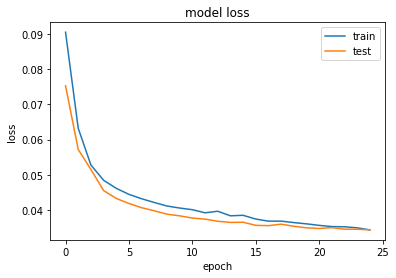

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 18)]    0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 100, 18)     72          ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 gru (GRU)                      (None, 100, 512)     817152      ['batch_normalization[0][0]']    
                                                                                                  
 dropout (Dropout)              (None, 100, 512)     0           ['gru[0][0]']                

In [ ]:

  ### GRU-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=GRU_Net(inputs_1D_N,inputs_2D_N)

model_1 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_1.compile(loss=correlation_coefficient_loss_1, optimizer='Adam', metrics=[correlation_coefficient_loss_1])


history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)


# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_1.summary()





In [ ]:
gc.collect()

5035

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
yhat_4 = model_1.predict([test_X_1D,test_X_2D])
# [yhat_1,yhat_2,yhat_3,yhat_4] = model_1.predict([test_X_1D,test_X_2D])
# yhat_3 = model_3.predict([test_X_1D,test_X_2D])



# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#

# y_1=yhat[:,0]
# y_2=yhat[:,1]
# y_3=yhat[:,2]
# y_4=yhat[:,3]
# y_5=yhat[:,4]
# y_6=yhat[:,5]
# y_7=yhat[:,6]
# y_8=yhat[:,7]
# y_9=yhat[:,8]



y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)
# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)


Z_1=y_1
Z_2=y_2
Z_3=y_3
Z_4=y_4
Z_5=y_5
Z_6=y_6

###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)


7.994365991771023
10.214169899378206
12.88409705135893
7.568769239038288
5.414021540469154
3.5947529741085593


0.9014724131687655
0.7915441790777938
0.8888821859753279
0.891886648755505
0.9813979753194237
0.9624399600568037
Mean: 7.945 +/- 3.317
Mean: 0.903 +/- 0.067


In [ ]:
RMSE_GRU=rmse
PCC_GRU=p

In [ ]:
gc.collect()
gc.collect()

0

Epoch 1/10
541/541 - 21s - loss: 0.0489 - correlation_coefficient_loss: 0.0471 - val_loss: 0.0255 - val_correlation_coefficient_loss: 0.0237 - 21s/epoch - 39ms/step
Epoch 2/10
541/541 - 17s - loss: 0.0241 - correlation_coefficient_loss: 0.0221 - val_loss: 0.0215 - val_correlation_coefficient_loss: 0.0194 - 17s/epoch - 32ms/step
Epoch 3/10
541/541 - 17s - loss: 0.0192 - correlation_coefficient_loss: 0.0171 - val_loss: 0.0179 - val_correlation_coefficient_loss: 0.0157 - 17s/epoch - 32ms/step
Epoch 4/10
541/541 - 18s - loss: 0.0178 - correlation_coefficient_loss: 0.0156 - val_loss: 0.0206 - val_correlation_coefficient_loss: 0.0184 - 18s/epoch - 32ms/step
Epoch 5/10
541/541 - 18s - loss: 0.0195 - correlation_coefficient_loss: 0.0167 - val_loss: 0.0176 - val_correlation_coefficient_loss: 0.0144 - 18s/epoch - 32ms/step
Epoch 6/10
541/541 - 18s - loss: 0.0167 - correlation_coefficient_loss: 0.0136 - val_loss: 0.0172 - val_correlation_coefficient_loss: 0.0141 - 18s/epoch - 32ms/step
Epoch 7/10

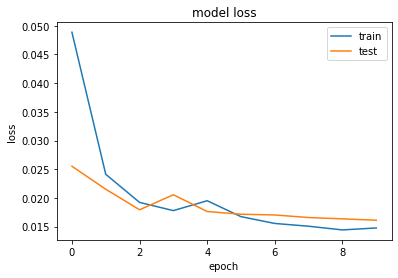

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100, 18)]    0           []                               
                                                                                                  
 batch_normalization_10 (BatchN  (None, 100, 18)     72          ['input_3[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 gru_2 (GRU)                    (None, 100, 512)     817152      ['batch_normalization_10[0][0]'] 
                                                                                                  
 dropout_6 (Dropout)            (None, 100, 512)     0           ['gru_2[0][0]']            

In [ ]:

  ### GRU-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=GRU_Net(inputs_1D_N,inputs_2D_N)

model_2 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_2.compile(loss=correlation_coefficient_loss, optimizer='Adam', metrics=[correlation_coefficient_loss])


history=model_2.fit([train_X_1D,train_X_2D], train_y_5, epochs=10, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)


# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_2.summary()



In [ ]:
gc.collect()

7731

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
yhat_4 = model_2.predict([test_X_1D,test_X_2D])

# [yhat_1,yhat_2,yhat_3,yhat_4] = model_2.predict([test_X_1D,test_X_2D])
# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#



y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)


Y_1=y_1
Y_2=y_2
Y_3=y_3
Y_4=y_4
Y_5=y_5
Y_6=y_6



# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)


10581.832876229762
11380.820033405942
16992.171888297205
11298.644623030908
10450.35981428113
3164.471828348263


-0.930139299917307
-0.8680695940282134
-0.8993990911010468
-0.8917541125927628
-0.9808950568113787
-0.9694134381595911
Mean: 10644.717 +/- 4410.339
Mean: -0.923 +/- 0.045


In [ ]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

In [ ]:
a_1,b_1=estimate_coef(Y_1,Z_1)
a_2,b_2=estimate_coef(Y_2,Z_2)
a_3,b_3=estimate_coef(Y_3,Z_3)
a_4,b_4=estimate_coef(Y_4,Z_4)
a_5,b_5=estimate_coef(Y_5,Z_5)
a_6,b_6=estimate_coef(Y_6,Z_6)

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_1 = model_2.predict([test_X_1D,test_X_2D])

yhat_4= model_2.predict([test_X_1D,test_X_2D])

# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#




y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)


# Y_1=y_1
# Y_2=y_2
# Y_3=y_3
# Y_4=y_4
# Y_5=y_5
# Y_6=y_6



y_1=y_1*b_1+a_1
y_2=y_2*b_2+a_2
y_3=y_3*b_3+a_3
y_4=y_4*b_4+a_4
y_5=y_5*b_5+a_5
y_6=y_6*b_1+a_1


y_bag_1=np.vstack((y_1,y_2,y_3,y_4,y_5,y_6))
y_bag_1=np.transpose(y_bag_1)



# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

7.294114009722601
8.544930293899965
12.569631412710613
7.73489587520571
5.566395469603698
3.928923302408975


0.9301392999173066
0.8680695940282116
0.8993990911010465
0.8917541125927634
0.9808950568113785
0.9694134381595909
Mean: 7.606 +/- 2.943
Mean: 0.923 +/- 0.045


In [ ]:
RMSE_GRU_DLR=rmse
PCC_GRU_DLR=p

In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()


0

Epoch 1/25
541/541 - 21s - loss: 0.2059 - correlation_coefficient_loss_joint: 0.2040 - val_loss: 0.1513 - val_correlation_coefficient_loss_joint: 0.1496 - 21s/epoch - 39ms/step
Epoch 2/25
541/541 - 17s - loss: 0.1100 - correlation_coefficient_loss_joint: 0.1075 - val_loss: 0.0986 - val_correlation_coefficient_loss_joint: 0.0961 - 17s/epoch - 32ms/step
Epoch 3/25
541/541 - 17s - loss: 0.0911 - correlation_coefficient_loss_joint: 0.0884 - val_loss: 0.1023 - val_correlation_coefficient_loss_joint: 0.0994 - 17s/epoch - 32ms/step
Epoch 4/25
541/541 - 18s - loss: 0.0813 - correlation_coefficient_loss_joint: 0.0783 - val_loss: 0.0800 - val_correlation_coefficient_loss_joint: 0.0769 - 18s/epoch - 32ms/step
Epoch 5/25
541/541 - 17s - loss: 0.0731 - correlation_coefficient_loss_joint: 0.0700 - val_loss: 0.0664 - val_correlation_coefficient_loss_joint: 0.0633 - 17s/epoch - 32ms/step
Epoch 6/25
541/541 - 17s - loss: 0.0702 - correlation_coefficient_loss_joint: 0.0671 - val_loss: 0.0643 - val_corre

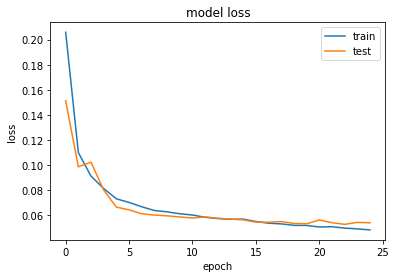

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 100, 18)]    0           []                               
                                                                                                  
 batch_normalization_20 (BatchN  (None, 100, 18)     72          ['input_5[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 gru_4 (GRU)                    (None, 100, 512)     817152      ['batch_normalization_20[0][0]'] 
                                                                                                  
 dropout_12 (Dropout)           (None, 100, 512)     0           ['gru_4[0][0]']            

In [ ]:

  ### GRU-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=GRU_Net(inputs_1D_N,inputs_2D_N)

model_3 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_3.compile(loss=correlation_coefficient_loss_joint, optimizer='Adam', metrics=[correlation_coefficient_loss_joint])


history=model_3.fit([train_X_1D,train_X_2D], train_y_5, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)


# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_3.summary()



In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_1 = model_2.predict([test_X_1D,test_X_2D])

yhat_4= model_3.predict([test_X_1D,test_X_2D])

# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#




y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)




# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

9.088471983022398
8.79167760963341
13.884326482950254
7.838900420324042
6.135810004203913
3.843798125462604


0.8944755697080065
0.8107761307018189
0.8838988163271778
0.8946486542406837
0.9795555252200825
0.9597668750670498
Mean: 8.264 +/- 3.370
Mean: 0.904 +/- 0.060


In [ ]:
RMSE_GRU_JL=rmse
PCC_GRU_JL=p

In [ ]:
print(RMSE_GRU_JL.shape)

RMSE=np.vstack([RMSE_GRU,RMSE_GRU_DLR,RMSE_GRU_JL])

print(RMSE)

(6,)
[[ 7.99436599 10.2141699  12.88409705  7.56876924  5.41402154  3.59475297]
 [ 7.29411401  8.54493029 12.56963141  7.73489588  5.56639547  3.9289233 ]
 [ 9.08847198  8.79167761 13.88432648  7.83890042  6.13581     3.84379813]]


# Conv2D-Net, Conv2D-DLR-Net, Conv2D-JL-Net

Epoch 1/25
541/541 - 30s - loss: 0.0963 - correlation_coefficient_loss_1: 0.0960 - val_loss: 0.0629 - val_correlation_coefficient_loss_1: 0.0629 - 30s/epoch - 55ms/step
Epoch 2/25
541/541 - 22s - loss: 0.0538 - correlation_coefficient_loss_1: 0.0536 - val_loss: 0.0496 - val_correlation_coefficient_loss_1: 0.0496 - 22s/epoch - 41ms/step
Epoch 3/25
541/541 - 22s - loss: 0.0501 - correlation_coefficient_loss_1: 0.0500 - val_loss: 0.0430 - val_correlation_coefficient_loss_1: 0.0429 - 22s/epoch - 41ms/step
Epoch 4/25
541/541 - 22s - loss: 0.0483 - correlation_coefficient_loss_1: 0.0481 - val_loss: 0.0420 - val_correlation_coefficient_loss_1: 0.0419 - 22s/epoch - 41ms/step
Epoch 5/25
541/541 - 22s - loss: 0.0470 - correlation_coefficient_loss_1: 0.0469 - val_loss: 0.0383 - val_correlation_coefficient_loss_1: 0.0382 - 22s/epoch - 41ms/step
Epoch 6/25
541/541 - 22s - loss: 0.0456 - correlation_coefficient_loss_1: 0.0455 - val_loss: 0.0356 - val_correlation_coefficient_loss_1: 0.0354 - 22s/epoc

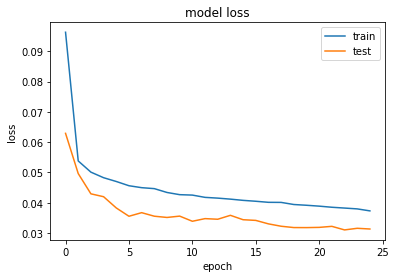

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 100, 6, 3)]  0           []                               
                                                                                                  
 batch_normalization_31 (BatchN  (None, 100, 6, 3)   12          ['input_8[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 conv2d_13 (Conv2D)             (None, 100, 6, 256)  11776       ['batch_normalization_31[0][0]'] 
                                                                                                  
 batch_normalization_33 (BatchN  (None, 100, 6, 256)  1024       ['conv2d_13[0][0]']        

In [ ]:

  ### Conv2D-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=Conv2D_Net(inputs_1D_N,inputs_2D_N)

model_1 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_1.compile(loss=correlation_coefficient_loss_1, optimizer='Adam', metrics=[correlation_coefficient_loss_1])


history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)


# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_1.summary()



In [ ]:
gc.collect()

4584

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
yhat_4 = model_1.predict([test_X_1D,test_X_2D])
# [yhat_1,yhat_2,yhat_3,yhat_4] = model_1.predict([test_X_1D,test_X_2D])
# yhat_3 = model_3.predict([test_X_1D,test_X_2D])



# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#

# y_1=yhat[:,0]
# y_2=yhat[:,1]
# y_3=yhat[:,2]
# y_4=yhat[:,3]
# y_5=yhat[:,4]
# y_6=yhat[:,5]
# y_7=yhat[:,6]
# y_8=yhat[:,7]
# y_9=yhat[:,8]



y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)
# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)


Z_1=y_1
Z_2=y_2
Z_3=y_3
Z_4=y_4
Z_5=y_5
Z_6=y_6

###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)


6.329445879329184
7.433410885182284
10.305327706959385
7.205328034603363
5.988619115174462
4.208523810414366


0.9378012462401885
0.820398969187905
0.9221392149645343
0.9109977157688536
0.9807098008041217
0.9635399130985183
Mean: 6.912 +/- 2.019
Mean: 0.923 +/- 0.056


In [ ]:
RMSE_Conv2D=rmse
PCC_Conv2D=p

In [ ]:
gc.collect()
gc.collect()

0

Epoch 1/10
541/541 - 24s - loss: 0.0701 - correlation_coefficient_loss: 0.0701 - val_loss: 0.0235 - val_correlation_coefficient_loss: 0.0235 - 24s/epoch - 44ms/step
Epoch 2/10
541/541 - 22s - loss: 0.0244 - correlation_coefficient_loss: 0.0244 - val_loss: 0.0178 - val_correlation_coefficient_loss: 0.0178 - 22s/epoch - 41ms/step
Epoch 3/10
541/541 - 22s - loss: 0.0207 - correlation_coefficient_loss: 0.0207 - val_loss: 0.0161 - val_correlation_coefficient_loss: 0.0160 - 22s/epoch - 41ms/step
Epoch 4/10
541/541 - 22s - loss: 0.0188 - correlation_coefficient_loss: 0.0188 - val_loss: 0.0166 - val_correlation_coefficient_loss: 0.0166 - 22s/epoch - 41ms/step
Epoch 5/10
541/541 - 22s - loss: 0.0175 - correlation_coefficient_loss: 0.0175 - val_loss: 0.0166 - val_correlation_coefficient_loss: 0.0166 - 22s/epoch - 41ms/step
Epoch 6/10
541/541 - 22s - loss: 0.0164 - correlation_coefficient_loss: 0.0164 - val_loss: 0.0156 - val_correlation_coefficient_loss: 0.0156 - 22s/epoch - 41ms/step
Epoch 7/10

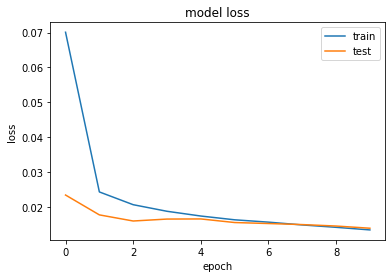

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 100, 6, 3)]  0           []                               
                                                                                                  
 batch_normalization_41 (BatchN  (None, 100, 6, 3)   12          ['input_10[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 conv2d_17 (Conv2D)             (None, 100, 6, 256)  11776       ['batch_normalization_41[0][0]'] 
                                                                                                  
 batch_normalization_43 (BatchN  (None, 100, 6, 256)  1024       ['conv2d_17[0][0]']        

In [ ]:

  ### GRU-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=Conv2D_Net(inputs_1D_N,inputs_2D_N)

model_2 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_2.compile(loss=correlation_coefficient_loss, optimizer='Adam', metrics=[correlation_coefficient_loss])


history=model_2.fit([train_X_1D,train_X_2D], train_y_5, epochs=10, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)


# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_2.summary()



In [ ]:
gc.collect()

54839

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
yhat_4 = model_2.predict([test_X_1D,test_X_2D])

# [yhat_1,yhat_2,yhat_3,yhat_4] = model_2.predict([test_X_1D,test_X_2D])
# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#



y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)


Y_1=y_1
Y_2=y_2
Y_3=y_3
Y_4=y_4
Y_5=y_5
Y_6=y_6



# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)


2373.071577340559
2262.2841047651327
4451.089681088483
2972.9862034965004
3903.582519673485
923.65400698122


-0.8843058077837106
-0.7671215345959811
-0.9187930408586923
-0.8934676303274084
-0.9674594491642452
-0.9465687311061991
Mean: 2814.445 +/- 1262.121
Mean: -0.896 +/- 0.071


In [ ]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

In [ ]:
a_1,b_1=estimate_coef(Y_1,Z_1)
a_2,b_2=estimate_coef(Y_2,Z_2)
a_3,b_3=estimate_coef(Y_3,Z_3)
a_4,b_4=estimate_coef(Y_4,Z_4)
a_5,b_5=estimate_coef(Y_5,Z_5)
a_6,b_6=estimate_coef(Y_6,Z_6)

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_1 = model_2.predict([test_X_1D,test_X_2D])

yhat_4= model_2.predict([test_X_1D,test_X_2D])

# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#




y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)


# Y_1=y_1
# Y_2=y_2
# Y_3=y_3
# Y_4=y_4
# Y_5=y_5
# Y_6=y_6



y_1=y_1*b_1+a_1
y_2=y_2*b_2+a_2
y_3=y_3*b_3+a_3
y_4=y_4*b_4+a_4
y_5=y_5*b_5+a_5
y_6=y_6*b_1+a_1


y_bag_1=np.vstack((y_1,y_2,y_3,y_4,y_5,y_6))
y_bag_1=np.transpose(y_bag_1)



# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

31.583300244331248
35.546509159644856
46.121960374340446
28.88412567943199
25.002800488075444
10.112412283136807


0.8843058077837106
0.7671215345959805
0.918793040858692
0.8934676303274095
0.9674594491642462
0.946568731106199
Mean: 29.542 +/- 11.947
Mean: 0.896 +/- 0.071


In [ ]:
RMSE_Conv2D_DLR=rmse
PCC_Conv2D_DLR=p

In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()


In [ ]:

  ### GRU-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=Conv2D_Net(inputs_1D_N,inputs_2D_N)

model_3 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_3.compile(loss=correlation_coefficient_loss_joint, optimizer='Adam', metrics=[correlation_coefficient_loss_joint])


history=model_3.fit([train_X_1D,train_X_2D], train_y_5, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)


# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_3.summary()



In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_1 = model_2.predict([test_X_1D,test_X_2D])

yhat_4= model_3.predict([test_X_1D,test_X_2D])

# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#




y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)




# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

In [ ]:
RMSE_Conv2D_JL=rmse
PCC_Conv2D_JL=p

# Conv1D-Net, Conv1D-DLR-Net, Conv1D-JL-Net


In [ ]:

  ### Conv1D-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=Conv1D_Net(inputs_1D_N,inputs_2D_N)

model_1 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_1.compile(loss=correlation_coefficient_loss_1, optimizer='Adam', metrics=[correlation_coefficient_loss_1])


history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)


# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_1.summary()



In [ ]:
gc.collect()

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
yhat_4 = model_1.predict([test_X_1D,test_X_2D])
# [yhat_1,yhat_2,yhat_3,yhat_4] = model_1.predict([test_X_1D,test_X_2D])
# yhat_3 = model_3.predict([test_X_1D,test_X_2D])



# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#

# y_1=yhat[:,0]
# y_2=yhat[:,1]
# y_3=yhat[:,2]
# y_4=yhat[:,3]
# y_5=yhat[:,4]
# y_6=yhat[:,5]
# y_7=yhat[:,6]
# y_8=yhat[:,7]
# y_9=yhat[:,8]



y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)
# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)


Z_1=y_1
Z_2=y_2
Z_3=y_3
Z_4=y_4
Z_5=y_5
Z_6=y_6

###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)


In [ ]:
RMSE_Conv1D=rmse
PCC_Conv1D=p

In [ ]:
gc.collect()
gc.collect()

In [ ]:

  ### Conv1D-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=Conv1D_Net(inputs_1D_N,inputs_2D_N)

model_2 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_2.compile(loss=correlation_coefficient_loss, optimizer='Adam', metrics=[correlation_coefficient_loss])


history=model_2.fit([train_X_1D,train_X_2D], train_y_5, epochs=10, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)


# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_2.summary()



In [ ]:
gc.collect()

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
yhat_4 = model_2.predict([test_X_1D,test_X_2D])

# [yhat_1,yhat_2,yhat_3,yhat_4] = model_2.predict([test_X_1D,test_X_2D])
# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#



y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)


Y_1=y_1
Y_2=y_2
Y_3=y_3
Y_4=y_4
Y_5=y_5
Y_6=y_6



# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)


In [ ]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

In [ ]:
a_1,b_1=estimate_coef(Y_1,Z_1)
a_2,b_2=estimate_coef(Y_2,Z_2)
a_3,b_3=estimate_coef(Y_3,Z_3)
a_4,b_4=estimate_coef(Y_4,Z_4)
a_5,b_5=estimate_coef(Y_5,Z_5)
a_6,b_6=estimate_coef(Y_6,Z_6)

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_1 = model_2.predict([test_X_1D,test_X_2D])

yhat_4= model_2.predict([test_X_1D,test_X_2D])

# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#




y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)


# Y_1=y_1
# Y_2=y_2
# Y_3=y_3
# Y_4=y_4
# Y_5=y_5
# Y_6=y_6



y_1=y_1*b_1+a_1
y_2=y_2*b_2+a_2
y_3=y_3*b_3+a_3
y_4=y_4*b_4+a_4
y_5=y_5*b_5+a_5
y_6=y_6*b_1+a_1


y_bag_1=np.vstack((y_1,y_2,y_3,y_4,y_5,y_6))
y_bag_1=np.transpose(y_bag_1)



# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

In [ ]:
RMSE_Conv1D_DLR=rmse
PCC_Conv1D_DLR=p

In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()


In [ ]:

  ### Conv1D-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=Conv1D_Net(inputs_1D_N,inputs_2D_N)

model_3 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_3.compile(loss=correlation_coefficient_loss_joint, optimizer='Adam', metrics=[correlation_coefficient_loss_joint])


history=model_3.fit([train_X_1D,train_X_2D], train_y_5, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)


# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_3.summary()



In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_1 = model_2.predict([test_X_1D,test_X_2D])

yhat_4= model_3.predict([test_X_1D,test_X_2D])

# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#




y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)




# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

In [ ]:
RMSE_Conv1D_JL=rmse
PCC_Conv1D_JL=p

# GRU-Conv2D-Net, GRU-Conv2D-DLR-Net, GRU-Conv2D-JL-Net

In [ ]:

  ### GRU-Conv2D-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=GRU_Conv2D_Net(inputs_1D_N,inputs_2D_N)



model_1= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_1.compile(loss=correlation_coefficient_loss_1, optimizer='Adam', metrics=[correlation_coefficient_loss_1])


# history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)
history=model_1.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_1.summary()



In [ ]:
gc.collect()

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_4 = model_1.predict([test_X_1D,test_X_2D])
[yhat_1,yhat_2,yhat_4] = model_1.predict([test_X_1D,test_X_2D])
# yhat_3 = model_3.predict([test_X_1D,test_X_2D])



# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#

# y_1=yhat[:,0]
# y_2=yhat[:,1]
# y_3=yhat[:,2]
# y_4=yhat[:,3]
# y_5=yhat[:,4]
# y_6=yhat[:,5]
# y_7=yhat[:,6]
# y_8=yhat[:,7]
# y_9=yhat[:,8]



y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)
# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)


Z_1=y_1
Z_2=y_2
Z_3=y_3
Z_4=y_4
Z_5=y_5
Z_6=y_6

###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)


In [ ]:
RMSE_GRU_Conv2D=rmse
PCC_GRU_Conv2D=p

In [ ]:
gc.collect()
gc.collect()

In [ ]:

  ### GRU-Conv2D-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=GRU_Conv2D_Net(inputs_1D_N,inputs_2D_N)



model_2= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_2.compile(loss=correlation_coefficient_loss, optimizer='Adam', metrics=[correlation_coefficient_loss])


# history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)
history=model_2.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=10, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_2.summary()



In [ ]:
gc.collect()

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_4 = model_2.predict([test_X_1D,test_X_2D])

[yhat_1,yhat_2,yhat_4] = model_2.predict([test_X_1D,test_X_2D])
# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#



y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)


Y_1=y_1
Y_2=y_2
Y_3=y_3
Y_4=y_4
Y_5=y_5
Y_6=y_6



# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)


In [ ]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

In [ ]:
a_1,b_1=estimate_coef(Y_1,Z_1)
a_2,b_2=estimate_coef(Y_2,Z_2)
a_3,b_3=estimate_coef(Y_3,Z_3)
a_4,b_4=estimate_coef(Y_4,Z_4)
a_5,b_5=estimate_coef(Y_5,Z_5)
a_6,b_6=estimate_coef(Y_6,Z_6)

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_1 = model_2.predict([test_X_1D,test_X_2D])

[yhat_1,yhat_2,yhat_4]= model_2.predict([test_X_1D,test_X_2D])

# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#




y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)


# Y_1=y_1
# Y_2=y_2
# Y_3=y_3
# Y_4=y_4
# Y_5=y_5
# Y_6=y_6



y_1=y_1*b_1+a_1
y_2=y_2*b_2+a_2
y_3=y_3*b_3+a_3
y_4=y_4*b_4+a_4
y_5=y_5*b_5+a_5
y_6=y_6*b_1+a_1


y_bag_1=np.vstack((y_1,y_2,y_3,y_4,y_5,y_6))
y_bag_1=np.transpose(y_bag_1)



# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

In [ ]:
RMSE_GRU_Conv2D_DLR=rmse
PCC_GRU_Conv2D_DLR=p

In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()


In [ ]:

  ### GRU-Conv2D-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=GRU_Conv2D_Net(inputs_1D_N,inputs_2D_N)



model_3= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_3.compile(loss=correlation_coefficient_loss_joint, optimizer='Adam', metrics=[correlation_coefficient_loss_joint])


# history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)
history=model_3.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_3.summary()



In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_1 = model_2.predict([test_X_1D,test_X_2D])

[yhat_1,yhat_2,yhat_4]= model_3.predict([test_X_1D,test_X_2D])

# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#




y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)




# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

In [ ]:
RMSE_GRU_Conv2D_JL=rmse
PCC_GRU_Conv2D_JL=p

# GRU-Conv1D-Net, GRU-Conv2D-DLR-Net, GRU-Conv2D-JL-Net

In [ ]:

  ### GRU-Conv1D-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=GRU_Conv1D_Net(inputs_1D_N,inputs_2D_N)



model_1= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_1.compile(loss=correlation_coefficient_loss_1, optimizer='Adam', metrics=[correlation_coefficient_loss_1])


# history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)
history=model_1.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_1.summary()



In [ ]:
gc.collect()

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_4 = model_1.predict([test_X_1D,test_X_2D])
[yhat_1,yhat_2,yhat_4] = model_1.predict([test_X_1D,test_X_2D])
# yhat_3 = model_3.predict([test_X_1D,test_X_2D])



# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#

# y_1=yhat[:,0]
# y_2=yhat[:,1]
# y_3=yhat[:,2]
# y_4=yhat[:,3]
# y_5=yhat[:,4]
# y_6=yhat[:,5]
# y_7=yhat[:,6]
# y_8=yhat[:,7]
# y_9=yhat[:,8]



y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)
# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)


Z_1=y_1
Z_2=y_2
Z_3=y_3
Z_4=y_4
Z_5=y_5
Z_6=y_6

###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)


In [ ]:
RMSE_GRU_Conv1D=rmse
PCC_GRU_Conv1D=p

In [ ]:
gc.collect()
gc.collect()

In [ ]:

  ### GRU-Conv2D-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=GRU_Conv1D_Net(inputs_1D_N,inputs_2D_N)



model_2= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_2.compile(loss=correlation_coefficient_loss, optimizer='Adam', metrics=[correlation_coefficient_loss])


# history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)
history=model_2.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=10, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_2.summary()



In [ ]:
gc.collect()

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_4 = model_2.predict([test_X_1D,test_X_2D])

[yhat_1,yhat_2,yhat_4] = model_2.predict([test_X_1D,test_X_2D])
# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#



y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)


Y_1=y_1
Y_2=y_2
Y_3=y_3
Y_4=y_4
Y_5=y_5
Y_6=y_6



# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)


In [ ]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

In [ ]:
a_1,b_1=estimate_coef(Y_1,Z_1)
a_2,b_2=estimate_coef(Y_2,Z_2)
a_3,b_3=estimate_coef(Y_3,Z_3)
a_4,b_4=estimate_coef(Y_4,Z_4)
a_5,b_5=estimate_coef(Y_5,Z_5)
a_6,b_6=estimate_coef(Y_6,Z_6)

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_1 = model_2.predict([test_X_1D,test_X_2D])

[yhat_1,yhat_2,yhat_4]= model_2.predict([test_X_1D,test_X_2D])

# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#




y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)


# Y_1=y_1
# Y_2=y_2
# Y_3=y_3
# Y_4=y_4
# Y_5=y_5
# Y_6=y_6



y_1=y_1*b_1+a_1
y_2=y_2*b_2+a_2
y_3=y_3*b_3+a_3
y_4=y_4*b_4+a_4
y_5=y_5*b_5+a_5
y_6=y_6*b_1+a_1


y_bag_1=np.vstack((y_1,y_2,y_3,y_4,y_5,y_6))
y_bag_1=np.transpose(y_bag_1)



# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

In [ ]:
RMSE_GRU_Conv1D_DLR=rmse
PCC_GRU_Conv1D_DLR=p

In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()


In [ ]:

  ### GRU-Conv2D-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=GRU_Conv1D_Net(inputs_1D_N,inputs_2D_N)



model_3= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_3.compile(loss=correlation_coefficient_loss_joint, optimizer='Adam', metrics=[correlation_coefficient_loss_joint])


# history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)
history=model_3.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_3.summary()



In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_1 = model_2.predict([test_X_1D,test_X_2D])

[yhat_1,yhat_2,yhat_4]= model_3.predict([test_X_1D,test_X_2D])

# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#




y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)




# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

In [ ]:
RMSE_GRU_Conv1D_JL=rmse
PCC_GRU_Conv1D_JL=p

# Conv2D-Conv1D-Net, Conv2D-Conv1D-DLR-Net, Conv2D-Conv1D-JL-Net

In [ ]:

  ### GRU-Conv2D-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=Conv2D_Conv1D_Net(inputs_1D_N,inputs_2D_N)



model_1= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_1.compile(loss=correlation_coefficient_loss_1, optimizer='Adam', metrics=[correlation_coefficient_loss_1])


# history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)
history=model_1.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_1.summary()



In [ ]:
gc.collect()

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_4 = model_1.predict([test_X_1D,test_X_2D])
[yhat_1,yhat_2,yhat_4] = model_1.predict([test_X_1D,test_X_2D])
# yhat_3 = model_3.predict([test_X_1D,test_X_2D])



# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#

# y_1=yhat[:,0]
# y_2=yhat[:,1]
# y_3=yhat[:,2]
# y_4=yhat[:,3]
# y_5=yhat[:,4]
# y_6=yhat[:,5]
# y_7=yhat[:,6]
# y_8=yhat[:,7]
# y_9=yhat[:,8]



y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)
# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)


Z_1=y_1
Z_2=y_2
Z_3=y_3
Z_4=y_4
Z_5=y_5
Z_6=y_6

###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)


In [ ]:
RMSE_Conv2D_Conv1D=rmse
PCC_Conv2D_Conv1D=p

In [ ]:
gc.collect()
gc.collect()

In [ ]:

  ### GRU-Conv2D-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=Conv2D_Conv1D_Net(inputs_1D_N,inputs_2D_N)



model_2= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_2.compile(loss=correlation_coefficient_loss, optimizer='Adam', metrics=[correlation_coefficient_loss])


# history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)
history=model_2.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=10, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_2.summary()



In [ ]:
gc.collect()

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_4 = model_2.predict([test_X_1D,test_X_2D])

[yhat_1,yhat_2,yhat_4] = model_2.predict([test_X_1D,test_X_2D])
# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#



y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)


Y_1=y_1
Y_2=y_2
Y_3=y_3
Y_4=y_4
Y_5=y_5
Y_6=y_6



# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)


In [ ]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

In [ ]:
a_1,b_1=estimate_coef(Y_1,Z_1)
a_2,b_2=estimate_coef(Y_2,Z_2)
a_3,b_3=estimate_coef(Y_3,Z_3)
a_4,b_4=estimate_coef(Y_4,Z_4)
a_5,b_5=estimate_coef(Y_5,Z_5)
a_6,b_6=estimate_coef(Y_6,Z_6)

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_1 = model_2.predict([test_X_1D,test_X_2D])

[yhat_1,yhat_2,yhat_4]= model_2.predict([test_X_1D,test_X_2D])

# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#




y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)


# Y_1=y_1
# Y_2=y_2
# Y_3=y_3
# Y_4=y_4
# Y_5=y_5
# Y_6=y_6



y_1=y_1*b_1+a_1
y_2=y_2*b_2+a_2
y_3=y_3*b_3+a_3
y_4=y_4*b_4+a_4
y_5=y_5*b_5+a_5
y_6=y_6*b_1+a_1


y_bag_1=np.vstack((y_1,y_2,y_3,y_4,y_5,y_6))
y_bag_1=np.transpose(y_bag_1)



# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

In [ ]:
RMSE_Conv2D_Conv1D_DLR=rmse
PCC_Conv2D_Conv1D_DLR=p

In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()


In [ ]:

  ### Conv2D_Conv1D_Net ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=Conv2D_Conv1D_Net(inputs_1D_N,inputs_2D_N)



model_3= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_3.compile(loss=correlation_coefficient_loss_joint, optimizer='Adam', metrics=[correlation_coefficient_loss_joint])


# history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)
history=model_3.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_3.summary()



In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_1 = model_2.predict([test_X_1D,test_X_2D])

[yhat_1,yhat_2,yhat_4]= model_3.predict([test_X_1D,test_X_2D])

# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#




y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)




# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

In [ ]:
RMSE_Conv2D_Conv1D_JL=rmse
PCC_Conv2D_Conv1D_JL=p

# Gait-Net, Gait-DLR-NET, Gait-JL-Net

Epoch 1/20
541/541 - 56s - loss: 0.3494 - dense_75_loss: 0.0938 - dense_74_loss: 0.0929 - dense_76_loss: 0.0909 - average_7_loss: 0.0695 - dense_75_correlation_coefficient_loss_1: 0.0938 - dense_74_correlation_coefficient_loss_1: 0.0929 - dense_76_correlation_coefficient_loss_1: 0.0909 - average_7_correlation_coefficient_loss_1: 0.0695 - val_loss: 0.2346 - val_dense_75_loss: 0.0572 - val_dense_74_loss: 0.0810 - val_dense_76_loss: 0.0453 - val_average_7_loss: 0.0486 - val_dense_75_correlation_coefficient_loss_1: 0.0573 - val_dense_74_correlation_coefficient_loss_1: 0.0812 - val_dense_76_correlation_coefficient_loss_1: 0.0453 - val_average_7_correlation_coefficient_loss_1: 0.0488
Epoch 2/20
541/541 - 46s - loss: 0.2181 - dense_75_loss: 0.0528 - dense_74_loss: 0.0644 - dense_76_loss: 0.0534 - average_7_loss: 0.0448 - dense_75_correlation_coefficient_loss_1: 0.0528 - dense_74_correlation_coefficient_loss_1: 0.0644 - dense_76_correlation_coefficient_loss_1: 0.0534 - average_7_correlation_co

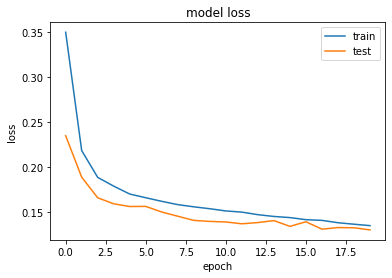

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 100, 18)]    0                                            
__________________________________________________________________________________________________
batch_normalization_70 (BatchNo (None, 100, 18)      72          input_15[0][0]                   
__________________________________________________________________________________________________
conv1d_28 (Conv1D)              (None, 100, 256)     14080       batch_normalization_70[0][0]     
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, 100, 6, 3)]  0                                            
____________________________________________________________________________________________

In [ ]:

  ### Gait-NET ###

w1=100

inputs_1D = tf.keras.layers.Input( shape=(w1,18) )
inputs_2D = tf.keras.layers.Input( shape=(w1,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output_3,output=Gait_Net(inputs_1D_N,inputs_2D_N)
# output=Gait_GRU_Net(inputs_1D_N,inputs_2D_N)



# model_1 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)
model_1 = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])

# model_2.compile(loss='mean_squared_error', optimizer='Adam')

model_1.compile(loss=correlation_coefficient_loss_1, optimizer='Adam', metrics=[correlation_coefficient_loss_1])


# history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)
history=model_1.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=20, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_1.summary()



In [ ]:
gc.collect()

88

6.529988009475696
6.992599357159765
11.106989531117426
6.996875021341322
4.873611046110258
3.733071821068535


0.9431522914310296
0.8593935133345134
0.9371512460818454
0.91776727053278
0.9881421947415108
0.9732258290426252
Mean: 6.706 +/- 2.520
Mean: 0.936 +/- 0.046


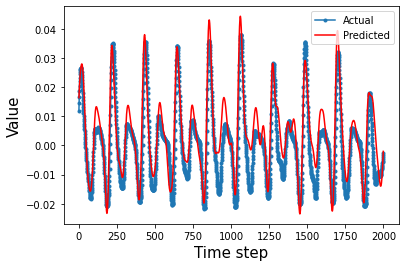

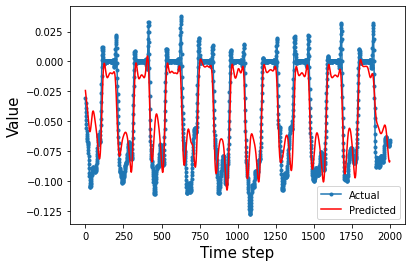

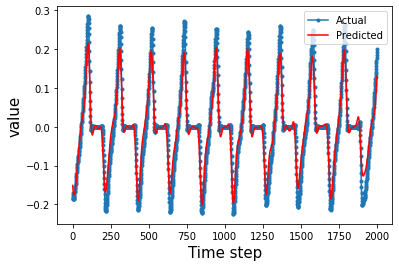

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_1 = model_1.predict([test_X_1D,test_X_2D])
[yhat_1,yhat_2,yhat_3,yhat_4] = model_1.predict([test_X_1D,test_X_2D])
# yhat_3 = model_3.predict([test_X_1D,test_X_2D])



# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

# s=(a2+1)*w

s=test_y.shape[0]*100

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#

# y_1=yhat[:,0]
# y_2=yhat[:,1]
# y_3=yhat[:,2]
# y_4=yhat[:,3]
# y_5=yhat[:,4]
# y_6=yhat[:,5]
# y_7=yhat[:,6]
# y_8=yhat[:,7]
# y_9=yhat[:,8]



y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)
# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)


Z_1=y_1
Z_2=y_2
Z_3=y_3
Z_4=y_4
Z_5=y_5
Z_6=y_6

###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

#        ### Saving correlation and RMSE ###

# aa=[x for x in range (2000)]
# aa=[y for y in range(2000)]

# aa=list(range(1,2000))
plt.plot(y_test_2[10000:12000], marker='.', label="Actual")
plt.plot(y_2[10000:12000], 'r', label="Predicted")
plt.ylabel('Value', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
#plt.savefig('Hip_flexion.png')
plt.show()


plt.plot(y_test_4[10000:12000], marker='.', label="Actual")
plt.plot(y_4[10000:12000], 'r', label="Predicted")
plt.ylabel('Value', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
#plt.savefig('Hip_abduction.png')
plt.show()


plt.plot(y_test_6[10000:12000], marker='.', label="Actual")
plt.plot( y_6[10000:12000], 'r', label="Predicted")
plt.ylabel('value', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
#plt.savefig('Hip_rotation.png')

plt.show()

In [ ]:
gc.collect()

9780

In [ ]:
RMSE_Gait=rmse
PCC_Gait=p

Epoch 1/14
541/541 - 50s - loss: 0.4251 - dense_45_loss: 0.1106 - dense_44_loss: 0.0973 - dense_46_loss: 0.1254 - average_4_loss: 0.0899 - dense_45_correlation_coefficient_loss: 0.1105 - dense_44_correlation_coefficient_loss: 0.0973 - dense_46_correlation_coefficient_loss: 0.1253 - average_4_correlation_coefficient_loss: 0.0899 - val_loss: 0.2146 - val_dense_45_loss: 0.0553 - val_dense_44_loss: 0.0556 - val_dense_46_loss: 0.0511 - val_average_4_loss: 0.0502 - val_dense_45_correlation_coefficient_loss: 0.0554 - val_dense_44_correlation_coefficient_loss: 0.0556 - val_dense_46_correlation_coefficient_loss: 0.0510 - val_average_4_correlation_coefficient_loss: 0.0502
Epoch 2/14
541/541 - 44s - loss: 0.2081 - dense_45_loss: 0.0521 - dense_44_loss: 0.0509 - dense_46_loss: 0.0571 - average_4_loss: 0.0454 - dense_45_correlation_coefficient_loss: 0.0521 - dense_44_correlation_coefficient_loss: 0.0509 - dense_46_correlation_coefficient_loss: 0.0571 - average_4_correlation_coefficient_loss: 0.0454

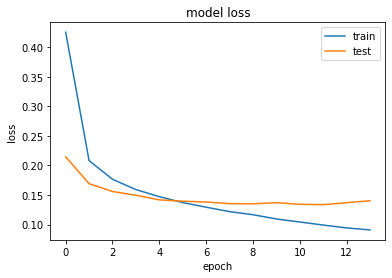

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 100, 18)]    0                                            
__________________________________________________________________________________________________
batch_normalization_40 (BatchNo (None, 100, 18)      72          input_9[0][0]                    
__________________________________________________________________________________________________
conv1d_16 (Conv1D)              (None, 100, 256)     14080       batch_normalization_40[0][0]     
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 100, 6, 3)]  0                                            
____________________________________________________________________________________________

In [ ]:

  ### Gait-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output_3,output=Gait_Net(inputs_1D_N,inputs_2D_N)
# output=Gait_GRU_Net(inputs_1D_N,inputs_2D_N)



# model_2 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)
model_2 = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])

# model_2.compile(loss='mean_squared_error', optimizer='Adam')


model_2.compile(loss=correlation_coefficient_loss, optimizer='Adam', metrics=[correlation_coefficient_loss])




# history=model_2.fit([train_X_1D,train_X_2D], train_y_5,, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)
history=model_2.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=14, batch_size=64, validation_data=([X_validation_1D,X_validation_2D],\
                                                                                                        [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_2.summary()



In [ ]:
gc.collect()

57625

5755.1302542675485
6277.902132284778
9241.575064067687
6467.496060445228
5697.113197818871
1690.112479549362


-0.9130773184308411
-0.809998366136899
-0.919350111189095
-0.8791829573400546
-0.9503244919615923
-0.9033212764647125
Mean: 5854.888 +/- 2425.039
Mean: -0.896 +/- 0.048


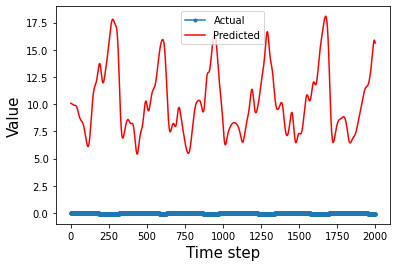

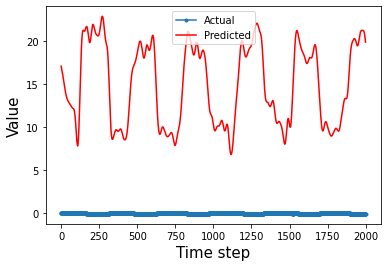

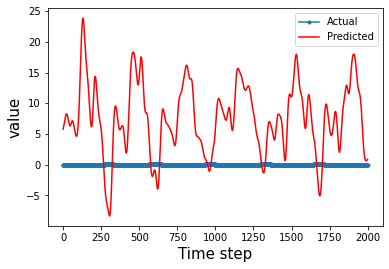

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_1 = model_2.predict([test_X_1D,test_X_2D])

[yhat_1,yhat_2,yhat_3,yhat_4] = model_2.predict([test_X_1D,test_X_2D])
# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#



y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)


Y_1=y_1
Y_2=y_2
Y_3=y_3
Y_4=y_4
Y_5=y_5
Y_6=y_6



# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

#        ### Saving correlation and RMSE ###

# aa=[x for x in range (2000)]
# aa=[y for y in range(2000)]

# aa=list(range(1,2000))
plt.plot(y_test_3[0000:2000], marker='.', label="Actual")
plt.plot(y_3[0000:2000], 'r', label="Predicted")
plt.ylabel('Value', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
#plt.savefig('Hip_flexion.png')
plt.show()


plt.plot(y_test_4[0000:2000], marker='.', label="Actual")
plt.plot(y_4[0000:2000], 'r', label="Predicted")
plt.ylabel('Value', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
#plt.savefig('Hip_abduction.png')
plt.show()


plt.plot(y_test_6[0000:2000], marker='.', label="Actual")
plt.plot( y_6[0000:2000], 'r', label="Predicted")
plt.ylabel('value', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
#plt.savefig('Hip_rotation.png')

plt.show()

In [ ]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

In [ ]:
a_1,b_1=estimate_coef(Y_1,Z_1)
a_2,b_2=estimate_coef(Y_2,Z_2)
a_3,b_3=estimate_coef(Y_3,Z_3)
a_4,b_4=estimate_coef(Y_4,Z_4)
a_5,b_5=estimate_coef(Y_5,Z_5)
a_6,b_6=estimate_coef(Y_6,Z_6)

8.358412611409008
7.554479194860754
11.88324064779993
8.249362214687991
8.815392214652999
5.698920495583439


0.9130773184308413
0.809998366136899
0.9193501111890936
0.8791829573400541
0.9503244919615934
0.9033212764647108
Mean: 8.427 +/- 2.017
Mean: 0.896 +/- 0.048


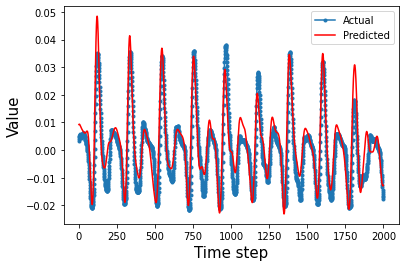

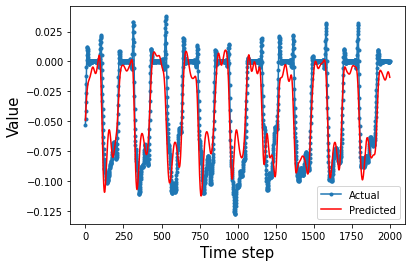

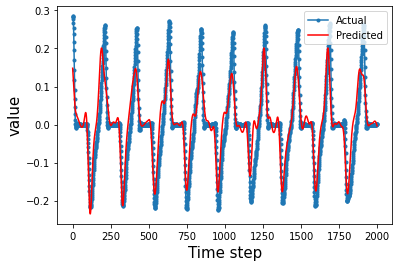

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_1 = model_2.predict([test_X_1D,test_X_2D])

[yhat_1,yhat_2,yhat_3,yhat_4]= model_2.predict([test_X_1D,test_X_2D])

# yhat_3 = model_3.predict([test_X_1D,test_X_2D])

# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#




y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)


# Y_1=y_1
# Y_2=y_2
# Y_3=y_3
# Y_4=y_4
# Y_5=y_5
# Y_6=y_6



y_1=y_1*b_1+a_1
y_2=y_2*b_2+a_2
y_3=y_3*b_3+a_3
y_4=y_4*b_4+a_4
y_5=y_5*b_5+a_5
y_6=y_6*b_1+a_1


y_bag_1=np.vstack((y_1,y_2,y_3,y_4,y_5,y_6))
y_bag_1=np.transpose(y_bag_1)



# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)




###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

#        ### Saving correlation and RMSE ###

# aa=[x for x in range (2000)]
# aa=[y for y in range(2000)]

# aa=list(range(1,2000))
plt.plot(y_test_2[10000:12000], marker='.', label="Actual")
plt.plot(y_2[10000:12000], 'r', label="Predicted")
plt.ylabel('Value', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
#plt.savefig('Hip_flexion.png')
plt.show()


plt.plot(y_test_4[10000:12000], marker='.', label="Actual")
plt.plot(y_4[10000:12000], 'r', label="Predicted")
plt.ylabel('Value', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
#plt.savefig('Hip_abduction.png')
plt.show()


plt.plot(y_test_6[10000:12000], marker='.', label="Actual")
plt.plot( y_6[10000:12000], 'r', label="Predicted")
plt.ylabel('value', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
#plt.savefig('Hip_rotation.png')

plt.show()

In [ ]:
RMSE_Gait_DLR=rmse
PCC_Gait_DLR=p

In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()


In [ ]:
gc.collect()

In [ ]:

  ### Gait-NET ###



inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output_3,output=Gait_Net(inputs_1D_N,inputs_2D_N)
# output=Gait_GRU_Net(inputs_1D_N,inputs_2D_N)



# model_1 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)
model_3= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])

# model_2.compile(loss='mean_squared_error', optimizer='Adam')

model_3.compile(loss=correlation_coefficient_loss_joint, optimizer='Adam', metrics=[correlation_coefficient_loss_joint])


# history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=25, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=False)
history=model_3.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=20, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
model_3.summary()



In [ ]:
gc.collect()

In [ ]:
 #### All 16 angles prediction  ####
# yhat_1 = model_1_1.predict([test_X_1D,test_X_2D])
# yhat_1 = model_1.predict([test_X_1D,test_X_2D])
[yhat_1,yhat_2,yhat_3,yhat_4] = model_3.predict([test_X_1D,test_X_2D])
# yhat_3 = model_3.predict([test_X_1D,test_X_2D])



# # print(yhat_1.shape)

# yhat_4=(yhat_1+yhat_2+yhat_3)/3

s=(a2+1)*w

test_o=test_y.reshape((s,6))
yhat=yhat_4.reshape((s,6))


# test_o=test_o[0:s-14,:]
# yhat=yhat[14:s,:]



y_1_no=yhat[:,0]
y_2_no=yhat[:,1]
y_3_no=yhat[:,2]
y_4_no=yhat[:,3]
y_5_no=yhat[:,4]
y_6_no=yhat[:,5]
# y_7_no=yhat[:,6]
# y_8_no=yhat[:,7]
# y_9_no=yhat[:,8]
# y_10_no=yhat[:,9]
# y_11_no=yhat[:,10]
# y_12_no=yhat[:,11]
# y_13_no=yhat[:,12]
# y_14_no=yhat[:,13]
# y_15_no=yhat[:,14]
# y_16_no=yhat[:,15]
#

# y_1=yhat[:,0]
# y_2=yhat[:,1]
# y_3=yhat[:,2]
# y_4=yhat[:,3]
# y_5=yhat[:,4]
# y_6=yhat[:,5]
# y_7=yhat[:,6]
# y_8=yhat[:,7]
# y_9=yhat[:,8]



y_test_1=test_o[:,0]
y_test_2=test_o[:,1]
y_test_3=test_o[:,2]
y_test_4=test_o[:,3]
y_test_5=test_o[:,4]
y_test_6=test_o[:,5]
# y_test_7=test_o[:,6]
# y_test_8=test_o[:,7]
# y_test_9=test_o[:,8]
# y_test_10=test_o[:,9]
# y_test_11=test_o[:,10]
# y_test_12=test_o[:,11]
# y_test_13=test_o[:,12]
# y_test_14=test_o[:,13]
# y_test_15=test_o[:,14]
# y_test_16=test_o[:,15]




#print(y_1.shape,y_test_1.shape)



cutoff=6
fs=200
order=4

nyq = 0.5 * fs
## filtering data ##
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)
# y_7= butter_lowpass_filter(y_7_no, cutoff, fs, order)
# y_8= butter_lowpass_filter(y_8_no, cutoff, fs, order)
# y_9= butter_lowpass_filter(y_9_no, cutoff, fs, order)
# y_10= butter_lowpass_filter(y_10_no, cutoff, fs, order)
# y_11= butter_lowpass_filter(y_11_no, cutoff, fs, order)
# y_12= butter_lowpass_filter(y_12_no, cutoff, fs, order)
# y_13= butter_lowpass_filter(y_13_no, cutoff, fs, order)
# y_14= butter_lowpass_filter(y_14_no, cutoff, fs, order)
# y_15= butter_lowpass_filter(y_15_no, cutoff, fs, order)
# y_16= butter_lowpass_filter(y_16_no, cutoff, fs, order)


Z_1=y_1
Z_2=y_2
Z_3=y_3
Z_4=y_4
Z_5=y_5
Z_6=y_6

###calculate RMSE

rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
# rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
# rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
# rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100

# rmse_1 =(np.sqrt(mean_squared_error(y_test_1,y_1)))*100
# rmse_2 =(np.sqrt(mean_squared_error(y_test_2,y_2)))*100
# rmse_3 =(np.sqrt(mean_squared_error(y_test_3,y_3)))*100
# rmse_4 =(np.sqrt(mean_squared_error(y_test_4,y_4)))*100
# rmse_5 =(np.sqrt(mean_squared_error(y_test_5,y_5)))*100
# rmse_6 =(np.sqrt(mean_squared_error(y_test_6,y_6)))*100
# rmse_7 =(np.sqrt(mean_squared_error(y_test_7,y_7)))*100
# rmse_8 =(np.sqrt(mean_squared_error(y_test_8,y_8)))*100
# rmse_9 =(np.sqrt(mean_squared_error(y_test_9,y_9)))*100






print(rmse_1)
print(rmse_2)
print(rmse_3)
print(rmse_4)
print(rmse_5)
print(rmse_6)
# print(rmse_7)
# print(rmse_8)
# print(rmse_9)
# print(rmse_10)
# print(rmse_11)
# print(rmse_12)
# print('Test RMSE: %.3f' % rmse_13)
# print('Test RMSE: %.3f' % rmse_14)
# print('Test RMSE: %.3f' % rmse_15)
# print('Test RMSE: %.3f' % rmse_16)




p_1=np.corrcoef(y_1, y_test_1)[0, 1]
p_2=np.corrcoef(y_2, y_test_2)[0, 1]
p_3=np.corrcoef(y_3, y_test_3)[0, 1]
p_4=np.corrcoef(y_4, y_test_4)[0, 1]
p_5=np.corrcoef(y_5, y_test_5)[0, 1]
p_6=np.corrcoef(y_6, y_test_6)[0, 1]
# p_7=np.corrcoef(y_7, y_test_7)[0, 1]
# p_8=np.corrcoef(y_8, y_test_8)[0, 1]
# p_9=np.corrcoef(y_9, y_test_9)[0, 1]
# p_10=np.corrcoef(y_10, y_test_10)[0, 1]
# p_11=np.corrcoef(y_11, y_test_11)[0, 1]
# p_12=np.corrcoef(y_12, y_test_12)[0, 1]
# p_13=np.corrcoef(y_13, y_test_13)[0, 1]
# p_14=np.corrcoef(y_14, y_test_14)[0, 1]
# p_15=np.corrcoef(y_15, y_test_15)[0, 1]
# p_16=np.corrcoef(y_16, y_test_16)[0, 1]

# print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12)

#print(p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10)

print("\n")
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
# print(p_7)
# print(p_8)
# print(p_9)
# print(p_10)
# print(p_11)
# print(p_12)
#print(p_1,p_2,p_3,p_4)


            ### Correlation ###
p=np.array([p_1,p_2,p_3,p_4,p_5,p_6])




    #### Mean and standard deviation ####

rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6])

    #### Mean and standard deviation ####
m=statistics.mean(rmse)
SD=statistics.stdev(rmse)
print('Mean: %.3f' % m,'+/- %.3f' %SD)

m_c=statistics.mean(p)
SD_c=statistics.stdev(p)
print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

#        ### Saving correlation and RMSE ###

# aa=[x for x in range (2000)]
# aa=[y for y in range(2000)]

# aa=list(range(1,2000))
plt.plot(y_test_2[10000:12000], marker='.', label="Actual")
plt.plot(y_2[10000:12000], 'r', label="Predicted")
plt.ylabel('Value', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
#plt.savefig('Hip_flexion.png')
plt.show()


plt.plot(y_test_4[10000:12000], marker='.', label="Actual")
plt.plot(y_4[10000:12000], 'r', label="Predicted")
plt.ylabel('Value', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
#plt.savefig('Hip_abduction.png')
plt.show()


plt.plot(y_test_6[10000:12000], marker='.', label="Actual")
plt.plot( y_6[10000:12000], 'r', label="Predicted")
plt.ylabel('value', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
#plt.savefig('Hip_rotation.png')

plt.show()

In [ ]:
RMSE_Gait_JL=rmse
PCC_Gait_JL=p

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
import pickle
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.utils import resample
import xgboost as xg

i=0
ix = [i for i in range(len(train_X_2D))]
train_ix = resample(ix, replace=True, n_samples=Bag_samples,random_state=None)
train_X_1D_1=train_X_1D[train_ix]
train_X_2D_1=train_X_2D[train_ix]
train_y_5_1=train_y_5[train_ix]

train_ix = resample(ix, replace=True, n_samples=Bag_samples,random_state=None)
train_X_1D_2=train_X_1D[train_ix]
train_X_2D_2=train_X_2D[train_ix]
train_y_5_2=train_y_5[train_ix]

train_ix = resample(ix, replace=True, n_samples=Bag_samples,random_state=None)
train_X_1D_3=train_X_1D[train_ix]
train_X_2D_3=train_X_2D[train_ix]
train_y_5_3=train_y_5[train_ix]

train_ix = resample(ix, replace=True, n_samples=Bag_samples,random_state=None)
train_X_1D_4=train_X_1D[train_ix]
train_X_2D_4=train_X_2D[train_ix]
train_y_5_4=train_y_5[train_ix]

train_ix = resample(ix, replace=True, n_samples=Bag_samples,random_state=None)
train_X_1D_5=train_X_1D[train_ix]
train_X_2D_5=train_X_2D[train_ix]
train_y_5_5=train_y_5[train_ix]

train_ix = resample(ix, replace=True, n_samples=Bag_samples,random_state=None)
train_X_1D_6=train_X_1D[train_ix]
train_X_2D_6=train_X_2D[train_ix]
train_y_5_6=train_y_5[train_ix]

train_ix = resample(ix, replace=True, n_samples=Bag_samples,random_state=None)
train_X_1D_7=train_X_1D[train_ix]
train_X_2D_7=train_X_2D[train_ix]
train_y_5_7=train_y_5[train_ix]

train_ix = resample(ix, replace=True, n_samples=Bag_samples,random_state=None)
train_X_1D_8=train_X_1D[train_ix]
train_X_2D_8=train_X_2D[train_ix]
train_y_5_8=train_y_5[train_ix]

train_ix = resample(ix, replace=True, n_samples=Bag_samples,random_state=None)
train_X_1D_9=train_X_1D[train_ix]
train_X_2D_9=train_X_2D[train_ix]
train_y_5_9=train_y_5[train_ix]

train_ix = resample(ix, replace=True, n_samples=Bag_samples,random_state=None)
train_X_1D_10=train_X_1D[train_ix]
train_X_2D_10=train_X_2D[train_ix]
train_y_5_10=train_y_5[train_ix]

